# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:

* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. The objective is to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.



## Importing necessary libraries and data

In [3]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.5f" % x)


from sklearn.model_selection import train_test_split
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [4]:
# Read in the data
df = pd.read_csv('INNHotelsGroup.csv')

In [5]:
# Print the data head
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [148]:
# Print the data tail
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


## Data Overview



In [149]:
# Check the shape of the data
df.shape

(36275, 19)

#### Observations

* There are 36,275 rows and 19 columns of data.



In [150]:
# Check the data types and number of Non-Null rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Observations

- The data types include float, int, and object.
- A majority of the data types are int.



In [151]:
# Check if there are missing values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#### Observations
* There are no missing values.

In [152]:
# Print the sum of duplicate values
df.duplicated().sum()

0

#### Observations
* There are no duplicated values.

In [153]:
# Check the statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


#### Observations
* The number of adults ranges from 0-4 with a mean of ~2 and median of 2 adults. 
* The bookings included 0-10 children with a median of 0 children.
* An average of 0.8 weekend nights were booked with a range of 0-7 days.
* 0-17 week nights were booked with an average of 2.2 days and median of 2 days.
* Required car parking spaces ranged from 0-1.
* Guests booked 0-443 days prior to their arrival date with an average of 85 days.
* The year of arrival ranged from 2017-2018.
* Guests booked with the hotel year around with July being the average month and August being the median.
* The average date of the month booked is the 15th with a range of 1st through 31st.
* The customer was either not a repeated guest (0) or a repeated guest (1).  Since the average is closer to 0 than 1 then there are more guests only booking once.
* 0-13 bookings were canceled by the customer prior to the current booking.
* 0-58 bookings were not canceled by the customer prior to the current booking.
* The average price per room was 0-540 euros with an average price of 103 euros. The median price was 99 euros.
* There were 0-5 special requests made by guests.

## Exploratory Data Analysis (EDA)

## Univariate Analysis

#### Number of Adults and Children

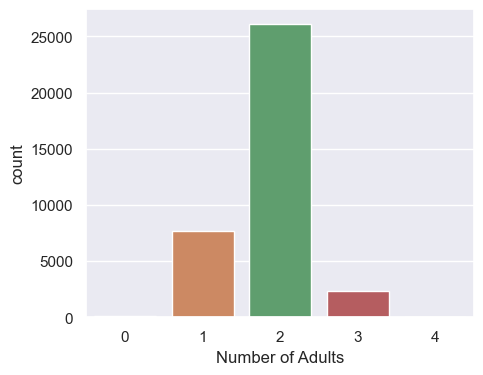

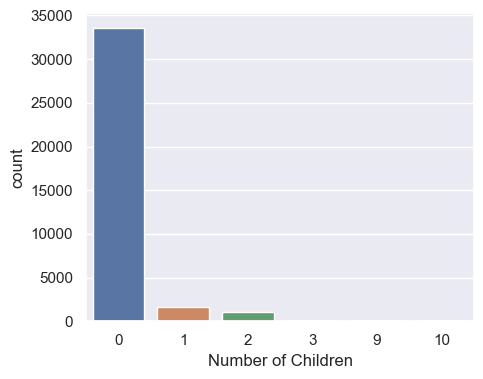

In [154]:
# Count plot of the number of adults
sns.set(rc={"figure.figsize":(5, 4)})
sns.countplot(data=df, x='no_of_adults')
plt.xlabel('Number of Adults')
plt.show()

# Countplot of the number of children
sns.countplot(data=df, x='no_of_children')
plt.xlabel('Number of Children')
plt.show()

In [155]:
# Print out the count of adults
df['no_of_adults'].value_counts().sort_values(ascending=False)

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

In [156]:
# Print out the count of children
df['no_of_children'].value_counts().sort_values(ascending=False)

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

#### Observations

- Most bookings include 2 adults and no children.  The data are right skewed.



#### Number of Weekend and Week Day Nights

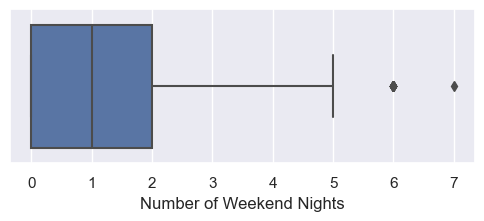

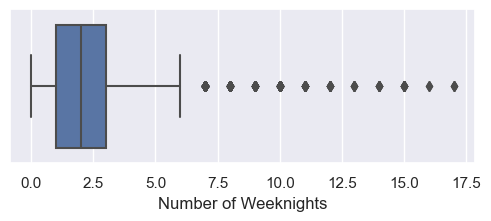

In [157]:
# Box plot of the number weekend nights
sns.set(rc={"figure.figsize":(6, 2)})
sns.boxplot(data=df, x='no_of_weekend_nights')
plt.xlabel('Number of Weekend Nights')
plt.show()

# Box plot of the number of weeknights
sns.boxplot(data=df, x='no_of_week_nights')
plt.xlabel('Number of Weeknights')
plt.show()

#### Observations
* Both sets of data are right skewed.
* There are two outliers in the number of weekend nights.  75% of the time guests book 2 weekend nights or less.
* 75% of the time guests book less than 5 weeknights. There are 11 outliers in the number of weeknights.  
* There are more weekdays booked than weekends which makes sense because there are more weekdays than weekend days. 

#### Type of Meal Plan

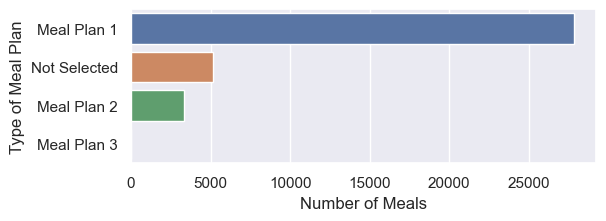

In [158]:
# Count plot of the types of meals
sns.countplot(data=df, y='type_of_meal_plan')
plt.xlabel('Number of Meals')
plt.ylabel('Type of Meal Plan')
plt.show()

In [159]:
# Print out the count of meal plans
df['type_of_meal_plan'].value_counts().sort_values(ascending=False)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

#### Observations
* The options for meal plan include:
    * Meal Plan 1: Breakfast
    * Meal Plan 2: Half board (breakfast and one other meal)
    * Meal Plan 3: Full board (breakfast, lunch, and dinner)
* Most guests selected Meal Plan 1 (breakfast).
* The least popular option is Meal Plan 3.

#### Required Parking Space

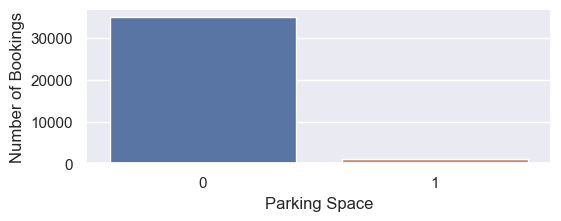

In [160]:
# Count plot of required parking space
sns.countplot(data=df, x='required_car_parking_space')
plt.xlabel('Parking Space')
plt.ylabel('Number of Bookings')
plt.show()

In [161]:
# Print out the count of parking space
df['required_car_parking_space'].value_counts().sort_values(ascending=False)

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

#### Observations

* Most guests do not require a parking space.



#### Room Type Reserved

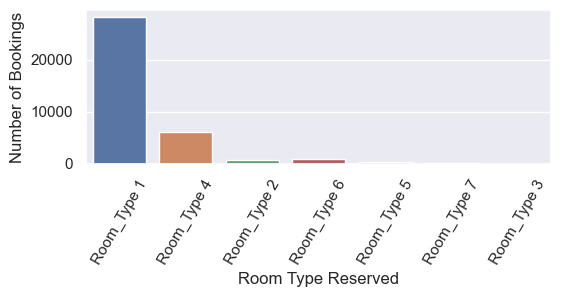

In [162]:
# Count plot of room type reserved
sns.countplot(data=df, x='room_type_reserved')
plt.xlabel('Room Type Reserved')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=60)
plt.show()

In [163]:
# Print out the count of room type reserved
df['room_type_reserved'].value_counts().sort_values(ascending=False)

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

#### Observations
* Most guests book Room_Type 1 followed by Room_Type 4 and Room_Type 6.

#### Lead Time

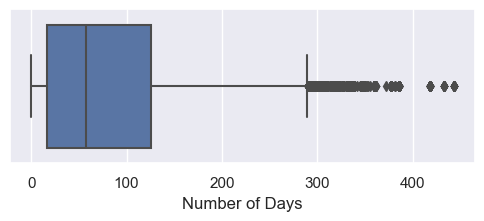

In [164]:
# Box plot of the lead time
sns.set(rc={"figure.figsize":(6, 2)})
sns.boxplot(data=df, x='lead_time')
plt.xlabel('Number of Days')
plt.show()

#### Observations

- The data are right skewed and there are outliers present.
- Guests book well in advance since at least 75% of guests book less than 200 days prior to their arrival date.



#### Arrival Year, Month, and Date

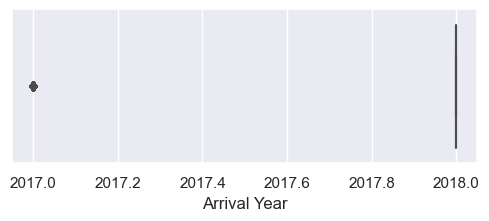

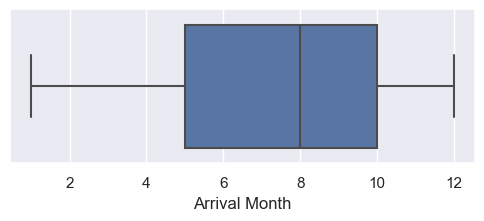

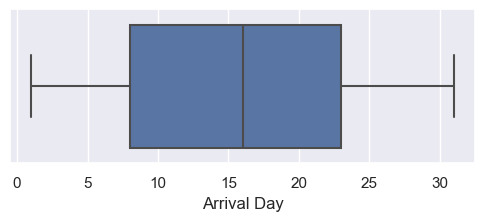

In [165]:
# Box plot of the arrival year
sns.set(rc={"figure.figsize":(6, 2)})
sns.boxplot(data=df, x='arrival_year')
plt.xlabel('Arrival Year')
plt.show()

# Box plot of the arrival month
sns.boxplot(data=df, x='arrival_month')
plt.xlabel('Arrival Month')
plt.show()


# Box plot of the arrival day
sns.boxplot(data=df, x='arrival_date')
plt.xlabel('Arrival Day')
plt.show()

In [166]:
# Print out the count of arrival year
df['arrival_year'].value_counts().sort_values(ascending=False)

2018    29761
2017     6514
Name: arrival_year, dtype: int64

In [167]:
# Print out the count of arrival months
df['arrival_month'].value_counts().sort_values(ascending=False)

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

In [168]:
# Print out the count of arrival days
df['arrival_date'].value_counts().sort_values(ascending=False)

13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64

#### Observations
* **Arrival Year**: there were 4.6 times more bookings in 2018 versus 2017.
* **Arrival Month**: October had the highest number of bookings followed by September and August.  January had the least amount of bookings.
* **Arrival Day**: the 13th, 17th, and the 2nd were the top three busiest days of the hotel. 

#### Market Segement Type

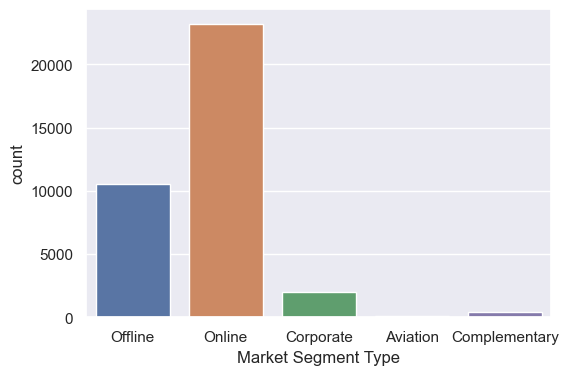

In [169]:
# Count plot of market segment type
sns.set(rc={"figure.figsize":(6, 4)})
sns.countplot(data=df, x='market_segment_type')
plt.xlabel('Market Segment Type')
plt.show()

In [170]:
# Print out the count of market segment type
df['market_segment_type'].value_counts().sort_values(ascending=False)

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

#### Observations

- Most guests came from the online market segment \(64%\) followed by offline and corporate.



#### Repeated Guest



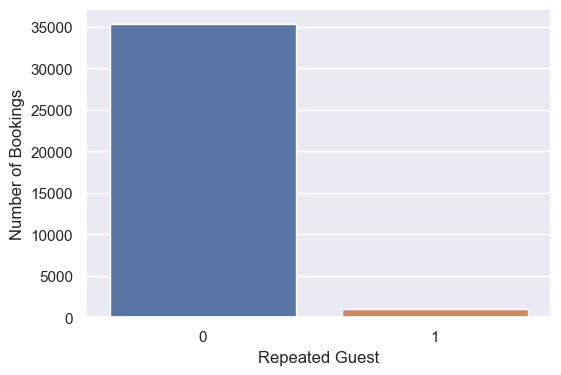

In [171]:
# Count plot of repeated guests
sns.countplot(data=df, x='repeated_guest')
plt.xlabel('Repeated Guest')
plt.ylabel('Number of Bookings')
plt.show()

In [172]:
# Print out the count of repeated guests
df['repeated_guest'].value_counts().sort_values(ascending=False)

0    35345
1      930
Name: repeated_guest, dtype: int64

#### Observations

* 97% of guests did not book with the hotel more than once.



#### Number of previous bookings cancelled and not cancelled



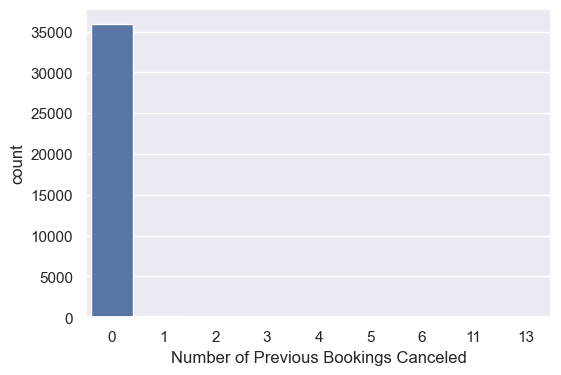

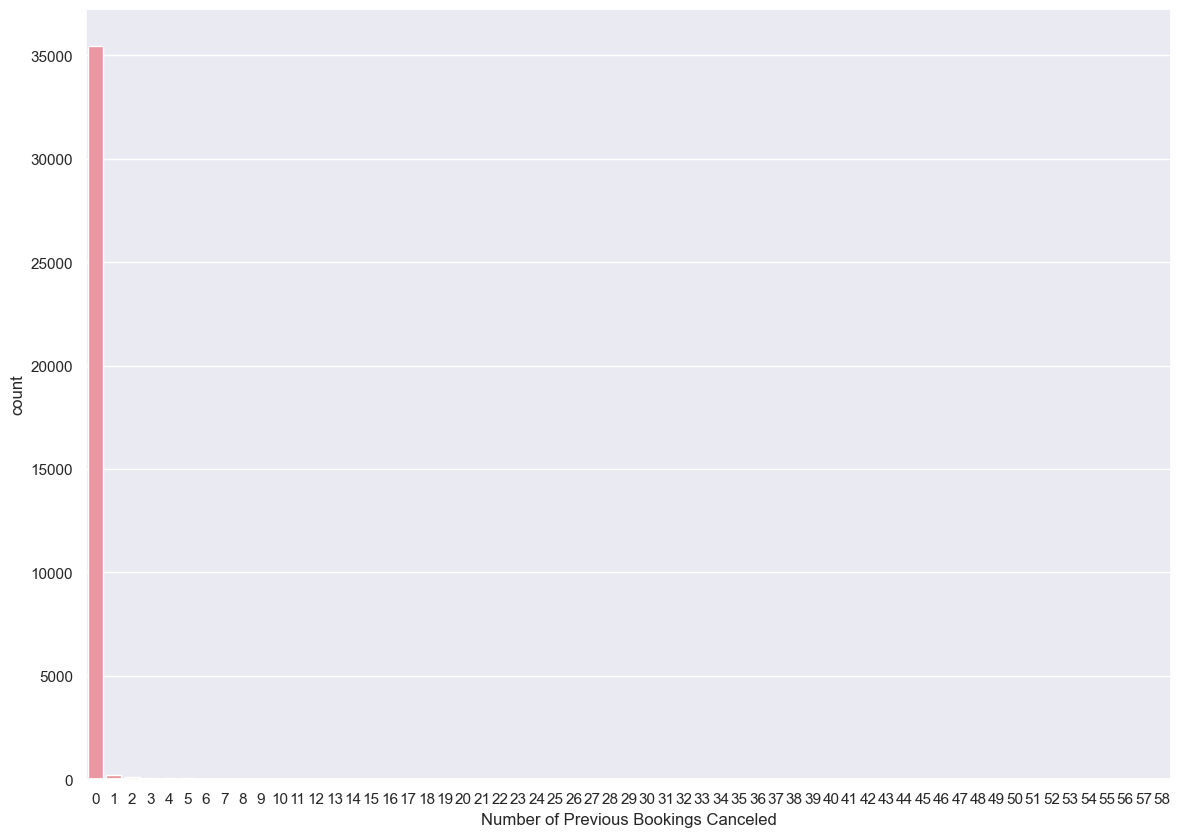

In [173]:
# Count plot of number of previous bookings canceled
sns.countplot(data=df, x='no_of_previous_cancellations')
plt.xlabel('Number of Previous Bookings Canceled')
plt.show()

# Count plot of number of previous bookings not canceled
sns.set(rc={"figure.figsize":(14, 10)})
sns.countplot(data=df, x='no_of_previous_bookings_not_canceled')
plt.xlabel('Number of Previous Bookings Canceled')
plt.show()

In [174]:
# Print out the count of number of previous bookings canceled
df['no_of_previous_cancellations'].value_counts().sort_values(ascending=False)

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

In [175]:
# Print out the count of number of previous bookings not canceled
df['no_of_previous_bookings_not_canceled'].value_counts().sort_values(ascending=False)

0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
13        7
16        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
26        2
31        2
30        2
32        2
48        2
28        2
44        2
29        2
56        1
47        1
49        1
52        1
39        1
34        1
38        1
51        1
42        1
37        1
33        1
35        1
50        1
43        1
40        1
41        1
58        1
54        1
53        1
57        1
45        1
55        1
46        1
36        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

#### Observations
* 98% of previous bookings were not canceled.

#### Average Price Per Room

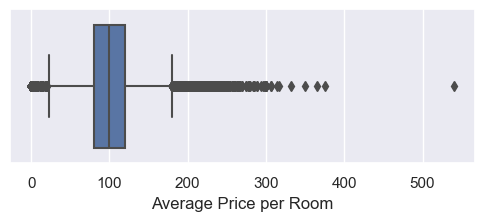

In [176]:
# Box plot of the average price per room
sns.set(rc={"figure.figsize":(6, 2)})
sns.boxplot(data=df, x='avg_price_per_room')
plt.xlabel('Average Price per Room')
plt.show()

#### Observations
* The data are symmetrically distributed excluding outliers.
* At least 75% of guests paid less than 200 euros for a room.

#### Number of Special Requests

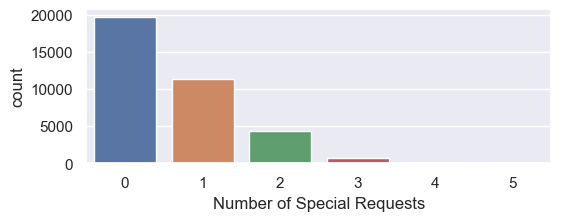

In [177]:
# Count plot of special requests
sns.countplot(data=df, x='no_of_special_requests')
plt.xlabel('Number of Special Requests')
plt.show()

In [178]:
# Print out the count of number of special requests
df['no_of_special_requests'].value_counts().sort_values(ascending=False)

0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64

#### Observations
* The data are right skewed.
* 55% of guests did not make any special requests and 31% of guests made 1 special request.

#### Booking Status

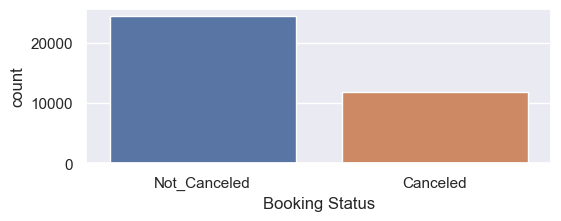

In [179]:
# Count plot of booking status (canceled or not)
sns.countplot(data=df, x='booking_status')
plt.xlabel('Booking Status')
plt.show()

In [180]:
# Print out the count of not canceled and canceled bookings
df['booking_status'].value_counts().sort_values(ascending=False)

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

#### Observations
* 67% of current bookings were not canceled while 33% of current bookings were canceled.

## Bivariate Analysis

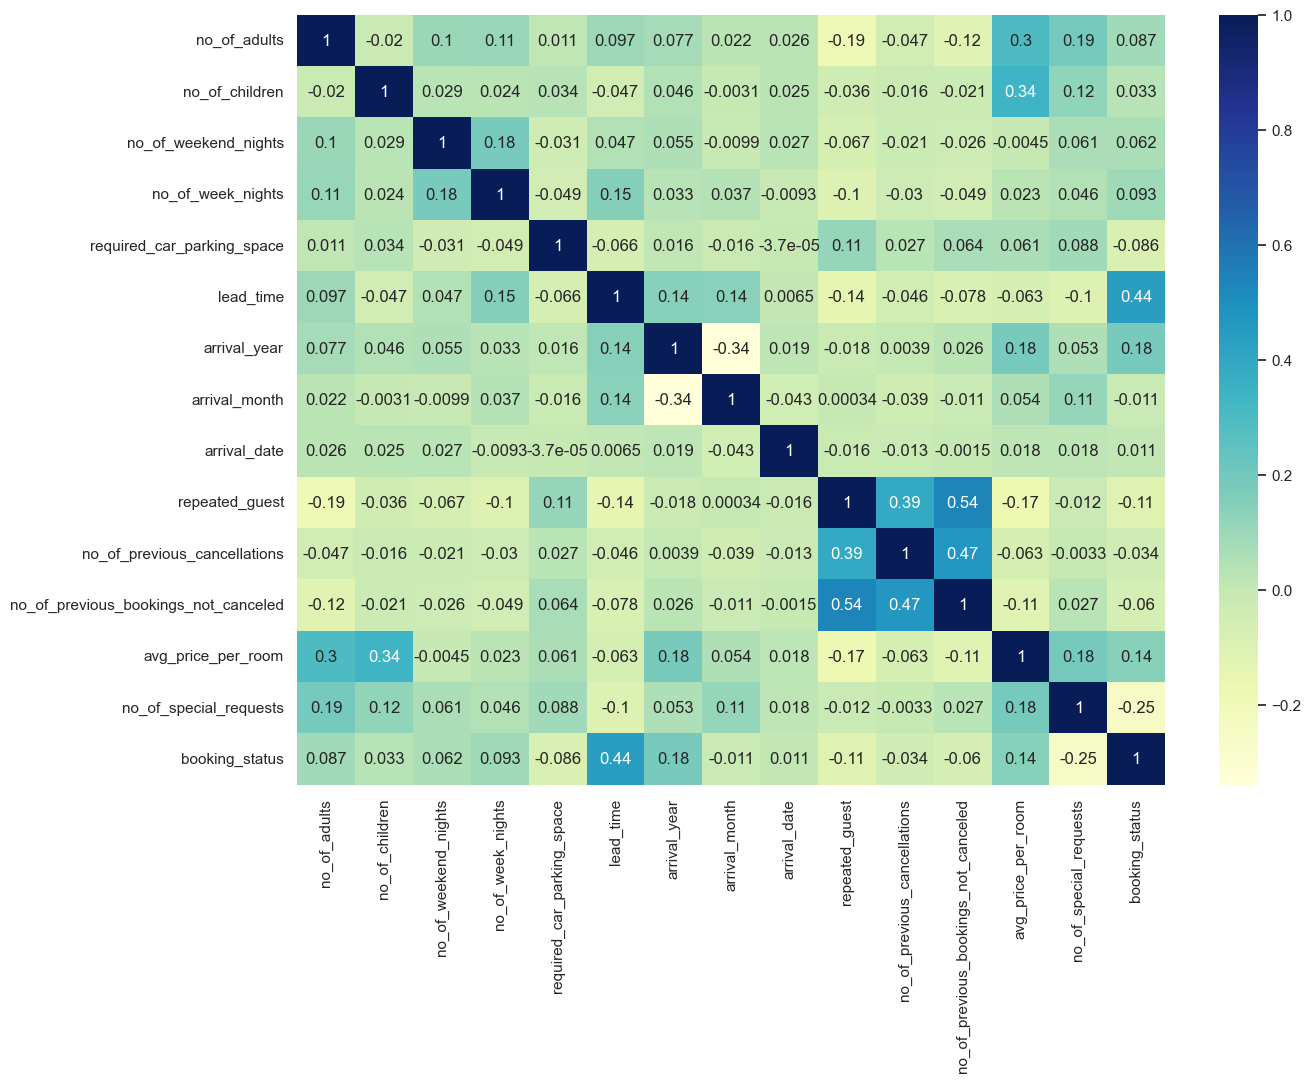

In [181]:
# Create a dataframe with only numerical variables
df_numvar = df.drop(columns=['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])

# Encode the booking status column with 0 and 1
df_numvar['booking_status'] = df_numvar['booking_status'].replace({'Not_Canceled':0, 'Canceled':1})

# Correlation heat map of the numerical variables
sns.set(rc={"figure.figsize":(14, 10)})
sns.heatmap(data=df_numvar.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### Correlation Coefficients

To interpret the correlation coefficient the following criteria are used from Hinkle, Wiersma, and Jurs (2003)$^{1}$:
* 0.9 to 1.0 (-0.9 to -1.0): very high positive (negative) correlation
* 0.7 to 0.9 (-0.7 to -0.9): high positive (negative) correlation
* 0.5 to 0.7 (-0.5 to -0.7): moderate positive (negative) correlation
* 0.3 to 0.5 (-0.3 to -0.5): low positive (negative) correlation
* 0.0 to 0.3 (0.0 to -0.3): negligible correlation

#### Observation

* Repeated guest and number of previous bookings not canceled are moderately, postively correlated (0.54)
* Number of previous cancellations and number of previous bookings show low positive correlation (0.47)
* Lead time and booking status have a low, positive correlation (0.44)
* Number of children and room price show a low, positive correlation (0.34)
* Number of adults and room price show a low, positive correlation (0.3)
* Arrival year and month show a low, negative correlation (-0.34)



### Does the number of adults or children influence cancellation?

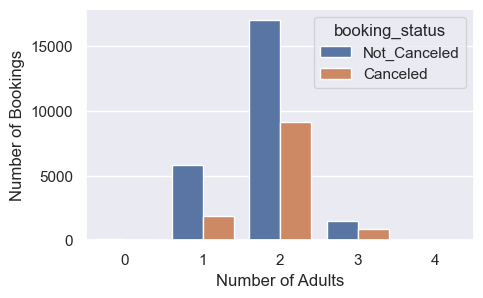

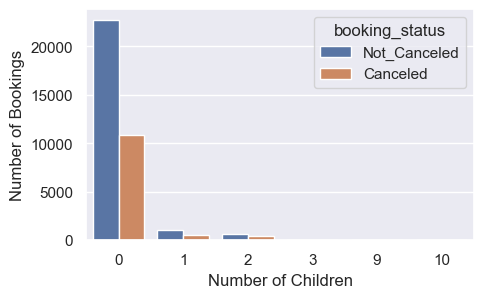

In [182]:
# Count plot of number of adults as it relates to cancellations
sns.set(rc={"figure.figsize":(5, 3)})
sns.countplot(data=df, x='no_of_adults', hue='booking_status')
plt.xlabel('Number of Adults')
plt.ylabel('Number of Bookings')
plt.show()

# Count plot of number of children as it relates to cancellations
sns.countplot(data=df, x='no_of_children', hue='booking_status')
plt.xlabel('Number of Children')
plt.ylabel('Number of Bookings')
plt.show()

#### Observations
* Overall, more current bookings were not cancelled than cancelled.
* Current bookings with 2 adults had the most not cancelled and canceled which is not suprising because the majority of bookings had 2 adults.  Bookings with 1 adult also had many not canceled.
* Current bookings with 0 children had the most not canceled and canceled bookings with more not canceled than canceled.  This distribution is right skewed.  This makes sense because more bookings were made with less children. 

### Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

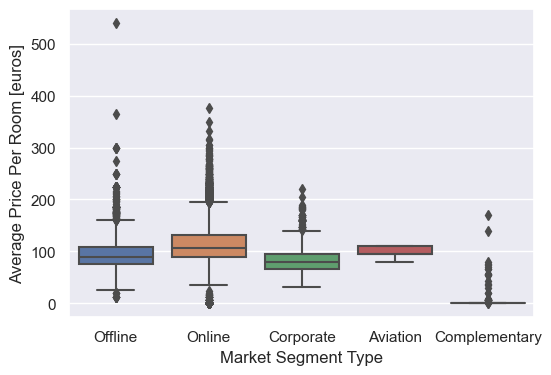

In [183]:
# Boxplots of the different room prices for different market segments
sns.set(rc={"figure.figsize":(6, 4)})
sns.boxplot(data=df, x='market_segment_type', y='avg_price_per_room')
plt.xlabel('Market Segment Type')
plt.ylabel('Average Price Per Room [euros]')
plt.show()

#### Observations
* There are many outliers present.
* The data for aviation are left skewed.
* Neglecting outliers, the data for offline, online, and corporate are symmetrically distributed.
* Online has some of the highest prices since the median is higher than the other categories.
* Complementary has some of the lowest prices.

### Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [184]:
# New dataframe of repeating guests
num_repeating_guests = df[df['repeated_guest'] == 1]

# Seperate out the repeating guests that have canceled at least once
repeat_cancel = num_repeating_guests[num_repeating_guests['no_of_previous_cancellations'] != 0]

# Compute the percentage of repeating guests that cancel
perc_repeat_cancel = repeat_cancel.shape[0]/num_repeating_guests.shape[0]*100

# Print the percentage of repeating guests that cancel
print('The percentage of repeating guests that cancel is ' + str(np.round(perc_repeat_cancel, decimals=1)) + '%.')

The percentage of repeating guests that cancel is 36.3%.


### Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

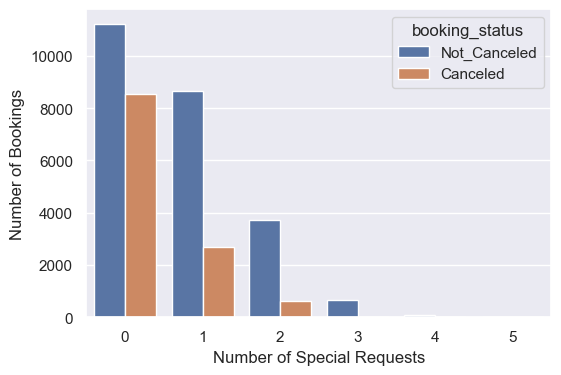

In [185]:
# Count plot of bookings status and number of requests
sns.countplot(data=df, x='no_of_special_requests', hue='booking_status')
plt.xlabel('Number of Special Requests')
plt.ylabel('Number of Bookings')
plt.show()

#### Observations
* The data are right skewed.
* The majority of bookings did not have any special requests.
* Guests with no special requests had the highest cancellations.

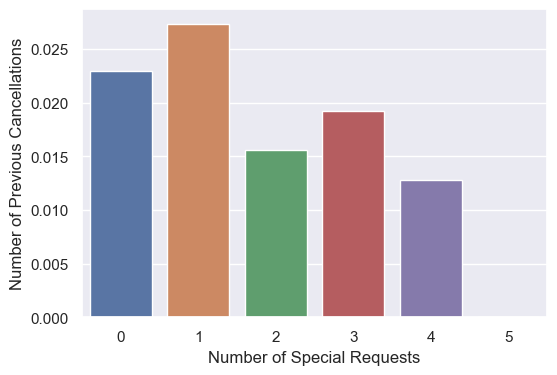

In [186]:
# Barplot of the number of special requests relating to the number of previous cancellations
sns.barplot(data=df, x='no_of_special_requests', y='no_of_previous_cancellations', ci=None)
plt.xlabel('Number of Special Requests')
plt.ylabel('Number of Previous Cancellations')
plt.show()

#### Observations
* The data are right skewed.
* Guests that made 1 special request showed the highest number of cancellations.
* Guests that made no special request also had a high rate of cancellation.

### The Trend of Yearly, Monthly, and Daily Bookings



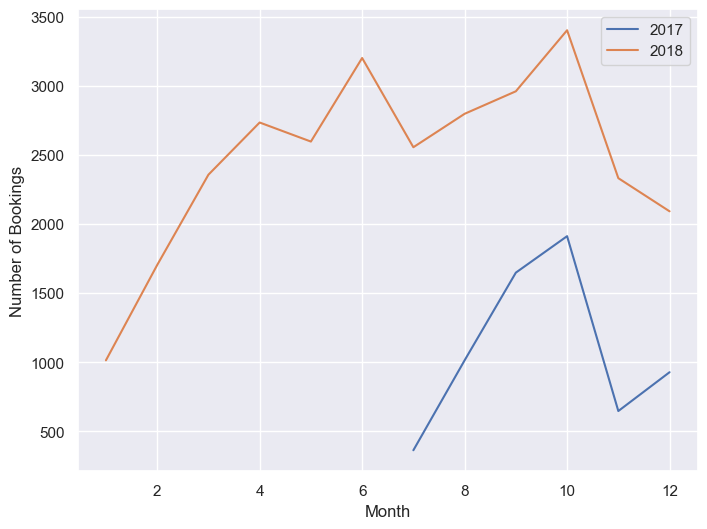

In [187]:
# Group the data by year
year_2017 = df[df['arrival_year'] == 2017]
year_2018 = df[df['arrival_year'] == 2018]

# Group the data by month
monthly_bookings_2017 = year_2017.groupby(['arrival_month'])['booking_status'].count()
monthly_bookings_2018 = year_2018.groupby(['arrival_month'])['booking_status'].count()

# Create dataframes with the summaries from bookings per month per year
mo_bookings_summary_2017 = pd.DataFrame({'month':list(monthly_bookings_2017.index),'num_bookings':list(monthly_bookings_2017.values)})
mo_bookings_summary_2018 = pd.DataFrame({'month':list(monthly_bookings_2018.index),'num_bookings':list(monthly_bookings_2018.values)})

# Lineplot comparing bookings per month per year
sns.set(rc={"figure.figsize":(8, 6)})
sns.lineplot(data=mo_bookings_summary_2017, x = 'month' , y='num_bookings', ci = False, label='2017')
sns.lineplot(data=mo_bookings_summary_2018, x = 'month' , y='num_bookings', ci = False, label='2018')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

#### Observations
* There were more bookings in 2018 compared to 2017.
* October was one of the busiest months for bookings for both years.
* 2017 had a peak in bookings in October.
* 2018 had peaks in bookings in June and October.

### The Trend of Number of Cancellations

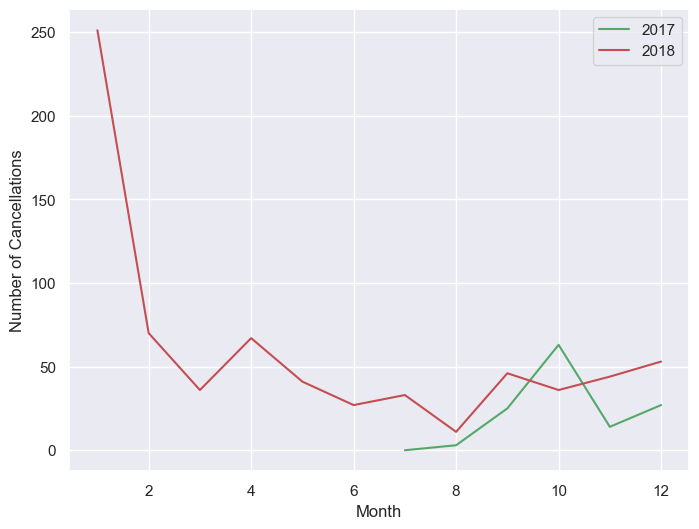

In [188]:
# Group the year data by month for cancellations
monthly_cancel_2017 = year_2017.groupby(['arrival_month'])['no_of_previous_cancellations'].sum()
monthly_cancel_2018 = year_2018.groupby(['arrival_month'])['no_of_previous_cancellations'].sum()

# Create dataframes with the summaries from cancellations per month per year
mo_cancel_summary_2017 = pd.DataFrame({'month':list(monthly_cancel_2017.index),'num_cancel':list(monthly_cancel_2017.values)})
mo_cancel_summary_2018 = pd.DataFrame({'month':list(monthly_cancel_2018.index),'num_cancel':list(monthly_cancel_2018.values)})

# Lineplot comparing cancellations per month per year
sns.set(rc={"figure.figsize":(8, 6)})
sns.lineplot(data=mo_cancel_summary_2017, x = 'month' , y='num_cancel', ci = False, label='2017', c='g')
sns.lineplot(data=mo_cancel_summary_2018, x = 'month' , y='num_cancel', ci = False, label='2018', c='r')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.show()

#### Observations

- January 2018 had the highest number of previous bookings that were canceled followed by July 2018.
- October 2017 had the highest number of previous bookings that were canceled for that year.



### The Trend of Previous Bookings Not Canceled 

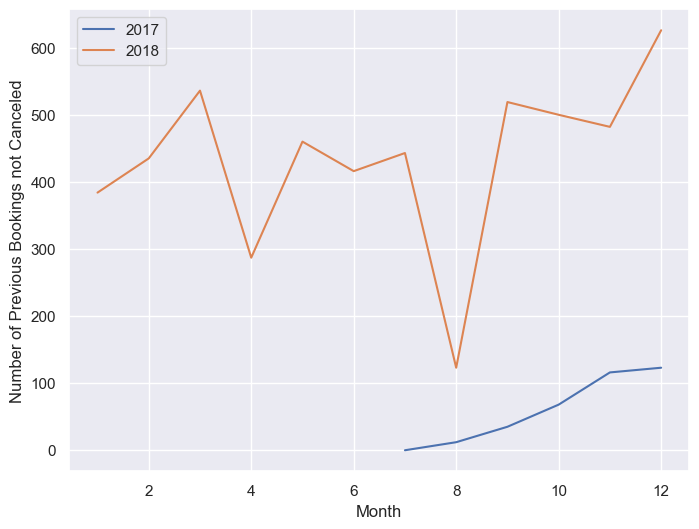

In [189]:
# Group the year data by month for bookings not canceled
prev_monthly_notcancel_2017 = year_2017.groupby(['arrival_month'])['no_of_previous_bookings_not_canceled'].sum()
prev_monthly_notcancel_2018 = year_2018.groupby(['arrival_month'])['no_of_previous_bookings_not_canceled'].sum()

# Create dataframes with the summaries from bookings not canceled per month per year
not_cancel_summary_2017 = pd.DataFrame({'month':list(prev_monthly_notcancel_2017.index),'prev_num_not_cancel':list(prev_monthly_notcancel_2017.values)})
not_cancel_summary_2018 = pd.DataFrame({'month':list(prev_monthly_notcancel_2018.index),'prev_num_not_cancel':list(prev_monthly_notcancel_2018.values)})

# Lineplot comparing bookings not canceled per month per year
sns.set(rc={"figure.figsize":(8, 6)})
sns.lineplot(data=not_cancel_summary_2017, x = 'month' , y='prev_num_not_cancel', ci = False, label='2017')
sns.lineplot(data=not_cancel_summary_2018, x = 'month' , y='prev_num_not_cancel', ci = False, label='2018')
plt.xlabel('Month')
plt.ylabel('Number of Previous Bookings not Canceled')
plt.show()

#### Observations
* In 2017 and 2018, January had the highest number of previous bookings not canceled.
* In 2018, the months of July and August had the lowest number of previous bookings not canceled.
* Over July to December there was a steady increase in the number of bookings not canceled in 2017.

### Variation of Average Room Prices Over Time

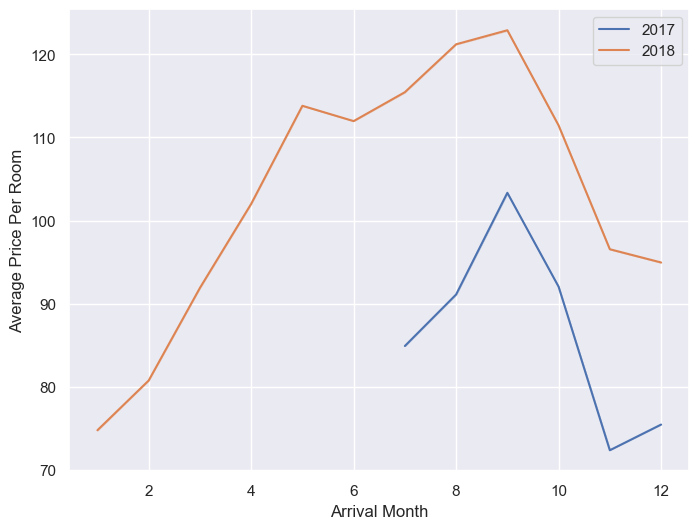

In [190]:
# Plot of price over months for 2017 and 2018
sns.lineplot(data=year_2017, x = 'arrival_month' , y='avg_price_per_room', ci = False, label='2017')
sns.lineplot(data=year_2018, x = 'arrival_month' , y='avg_price_per_room', ci = False, label='2018')
plt.xlabel('Arrival Month')
plt.ylabel('Average Price Per Room')
plt.legend()
plt.show()

#### Observations
* The average price per room was the highest for September among both years 2017 and 2018.
* The lowest price per room for 2018 was January, and the lowest for 2017 was Novemeber.

### Lead Time as it relates to Cancellations

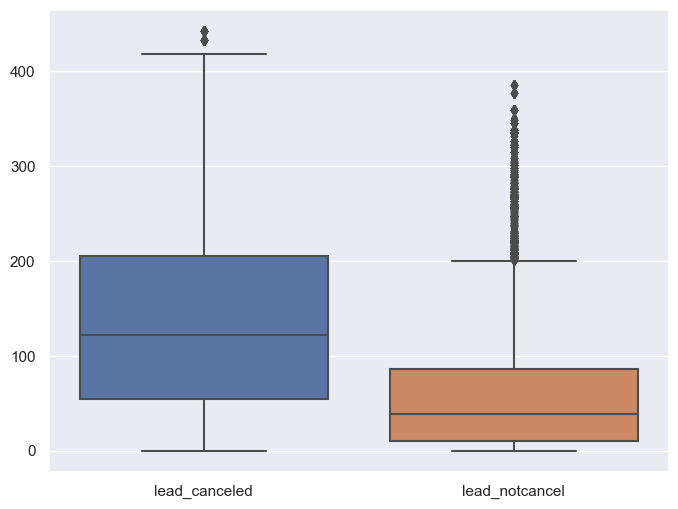

In [191]:
# Seperate out the canceled and not canceled bookings
canceled     = df[df['booking_status'] == 'Canceled']
not_canceled = df[df['booking_status'] == 'Not_Canceled']

# Create a dataframe with lead times of the canceled and not canceled bookings
lead_t_summary = pd.DataFrame({'lead_canceled': canceled['lead_time'], 'lead_notcancel': not_canceled['lead_time']})

# Boxplot of lead time and booking status
sns.boxplot(data=lead_t_summary)
plt.show()

#### Observations
* There are outliers present.
* The median is higher and the range is wider for the lead times of bookings that were canceled meaning that longer lead times are associated with more bookings being canceled.

### Does a Certain Market Segment have more Cancellations?



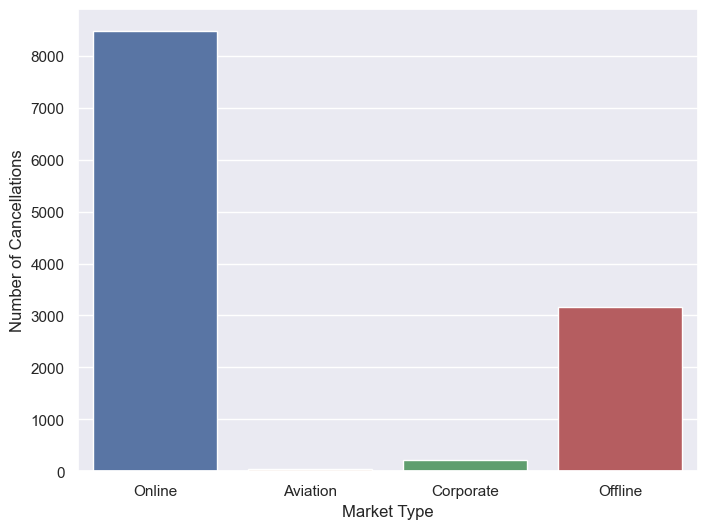

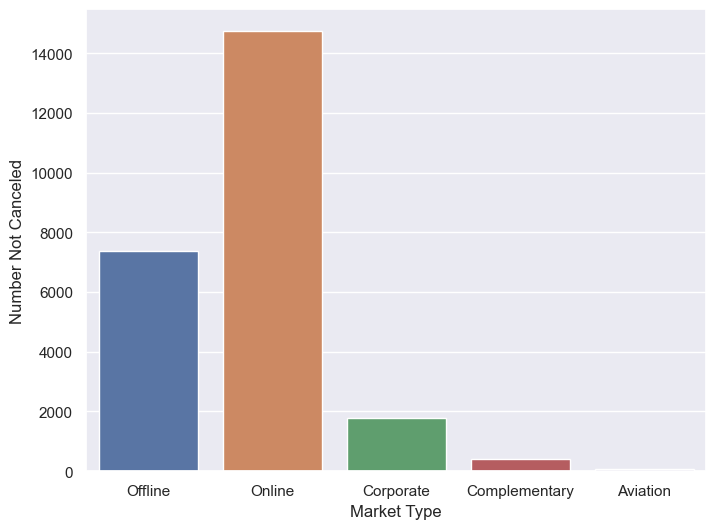

In [192]:
# Separate out the canceled and not canceled bookings
canceled     = df[df['booking_status'] == 'Canceled']
not_canceled = df[df['booking_status'] == 'Not_Canceled']

# Countplot of the number of cancellations per market type
sns.countplot(data=canceled, x='market_segment_type')
plt.xlabel('Market Type')
plt.ylabel('Number of Cancellations')
plt.show()

# Countplot of the number of bookings not canceled per market type
sns.countplot(data=not_canceled, x='market_segment_type')
plt.xlabel('Market Type')
plt.ylabel('Number Not Canceled')
plt.show()

#### Observations
* The online market had the highest number of cancellations, but it also had the highest number of bookings not canceled.  It is not suprising since the online market is the most popular method of booking.

### Does the Average Price Per Room Affect Booking Status?

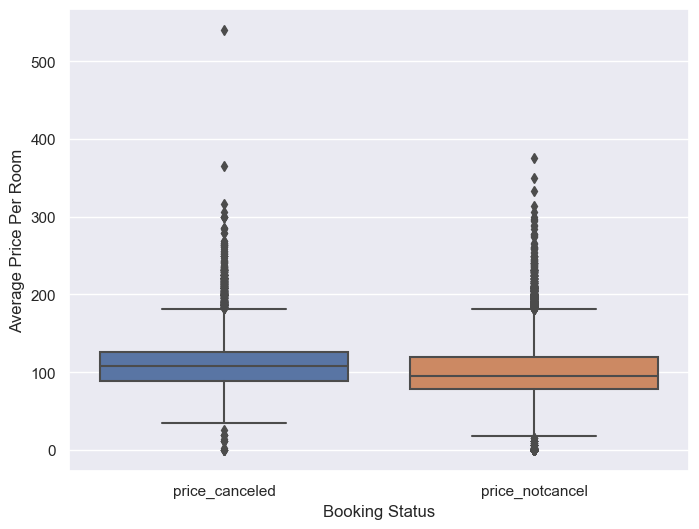

In [193]:
# Create a dataframe with lead times of the canceled and not canceled bookings
price_summary = pd.DataFrame({'price_canceled': canceled['avg_price_per_room'], 'price_notcancel': not_canceled['avg_price_per_room']})


# Boxplot of lead time and booking status
sns.boxplot(data=price_summary)
plt.xlabel('Booking Status')
plt.ylabel('Average Price Per Room')
plt.show()

#### Observations
* There are no drastic differences between canceled and not canceled as it relates to average price per room.

### EDA Summary

#### Key Insights
* Most bookings included 2 adults and no children.
* Room type 1 was the highest booked room type.
* Guests booked well in advance with 75% of guests booked less than 200 days prior to arrival day.
* There were 4.6 more bookings in 2018 than in 2017.
* October was the busiest month in both years.  In 2017, however, October showed the highest number of cancellations. In 2018, January had the highest number of cancelations.
* Most guests (64%) booked online.
* 97% of guests did not re-book.
* 98% of previous bookings were not canceled.
* The average room price was 100 euros and 75% of guests paid less than 200 euros.
* Guests who made 1 special request had the highest number of cancellations and 55% of guests did not make any requests.
* 67% of current bookings were not canceled, while 33% were canceled.
* Rooms booked online had the highest prices while complementary rooms had the lowest prices.
* 36.3% of repeated guests canceled.
* September 2017 and 2018 had the highest average price per room.  The lowest prices were in January 2018 and November 2017.

#### Main Points
* The highest number of cancellations was associated with the lowest average price per room.
* Most guests booked online and did not re-book.
* More current bookings were not canceled than canceled.
* October is the busiest time for the hotel.
* Longer lead times were associated with a higher number of cancellations.


## Data Preprocessing



* #### Missing value treatment

In [194]:
# Check if there are missing values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#### Observations
* There are no missing values in the data.

* #### Outlier detection and treatment

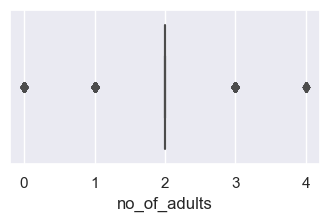

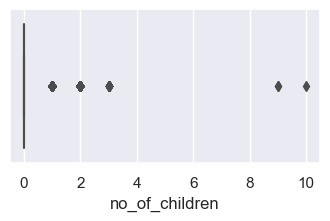

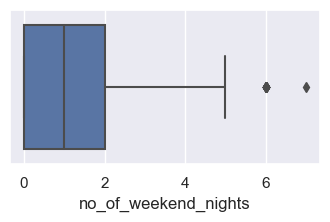

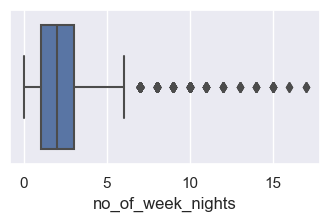

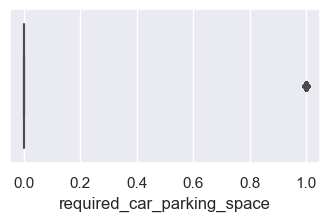

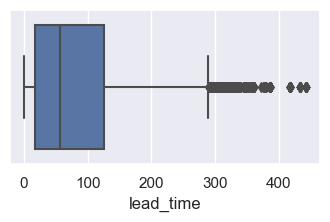

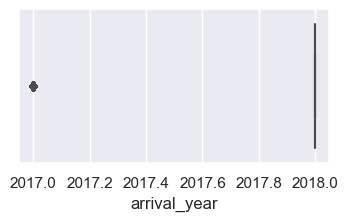

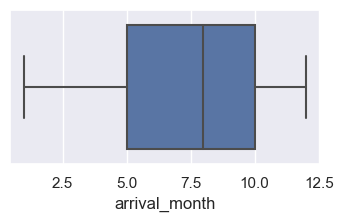

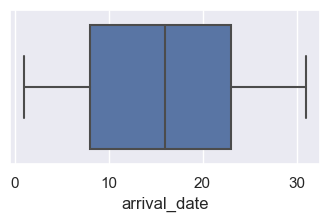

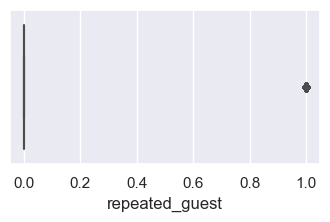

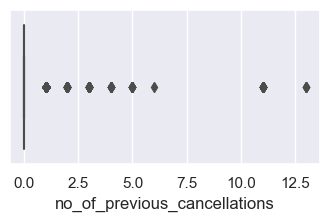

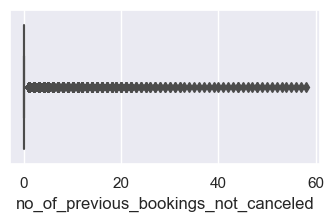

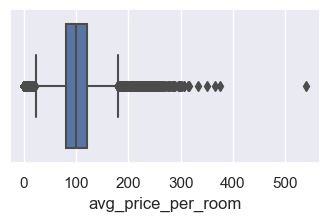

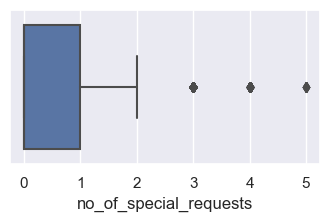

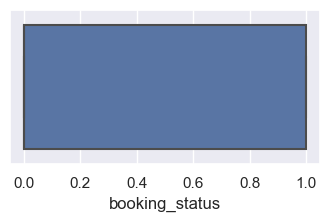

In [195]:
# Boxplots of the numerical variables to show outliers
sns.set(rc={"figure.figsize":(4, 2)})
cols = list(df_numvar.columns) # Convert column headers to a list
for num_var in cols:           # Loop through the numerical variables to plot
    sns.boxplot(x = df_numvar[num_var])
    plt.show()

#### Observations
* There are many outliers in the data.
* These are all genuine and reasonable points so the outliers will not be treated.

* #### Preparing data for modeling



In [196]:
# Copy the data to not affect the original data set
data = df.copy()

# Drop the booking ID column since they are all unique
data = data.drop(['Booking_ID'], axis=1)

# Encode booking_status column with 0 and 1
data['booking_status'] = data['booking_status'].replace({'Not_Canceled':0, 'Canceled':1})

# Encode year with 1 and 2
data['arrival_year'] = data['arrival_year'].replace({2017:2, 2018:1})

# Separate the predictor and target variables
X = data.drop(['booking_status'], axis=1)
Y = data['booking_status']

# Add constant to predictor variable
X = add_constant(X)

# Create dummy variables
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

# Confirm the split of the data
print('X_train has ' + str(X_train.shape[0]) + ' rows.')
print('y_train has ' + str(y_train.shape[0]) + ' rows.')
print('X_test has '  + str(X_test.shape[0])  + ' rows.')
print('y_test has '  + str(y_test.shape[0])  + ' rows.')

X_train has 25392 rows.
y_train has 25392 rows.
X_test has 10883 rows.
y_test has 10883 rows.


## EDA after manipulating the data

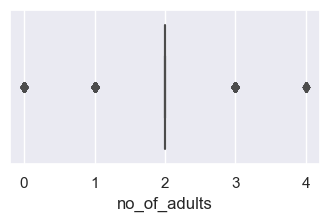

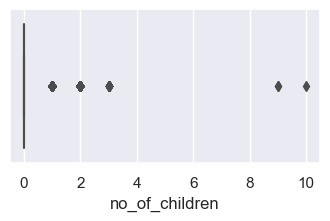

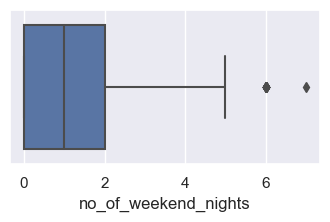

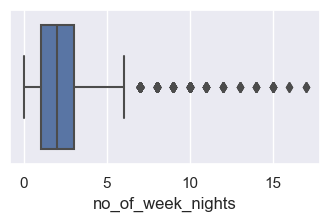

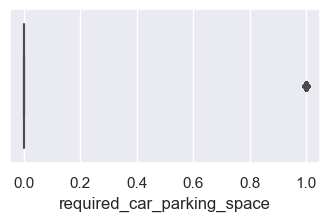

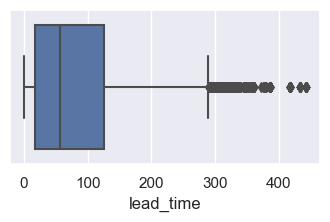

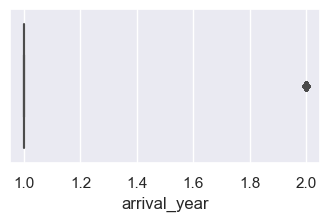

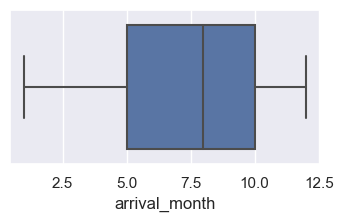

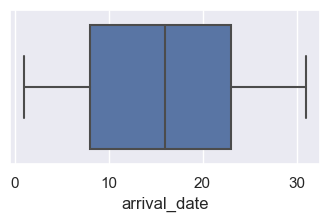

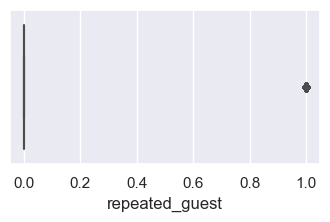

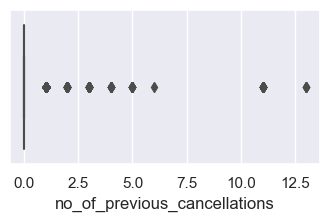

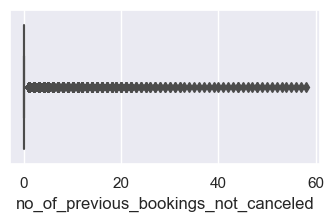

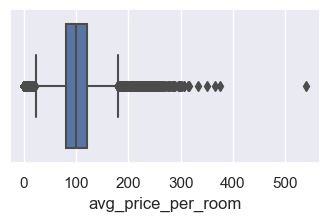

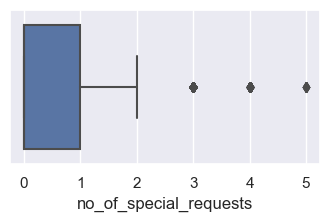

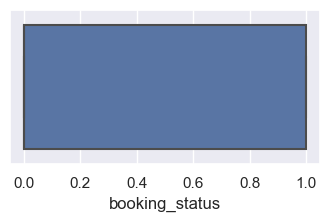

In [197]:
# Separate the numerical columns
data_numvar = data.drop(columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])

# Boxplots of the numerical variables
sns.set(rc={"figure.figsize":(4, 2)})
cols = list(data_numvar.columns) # Convert column headers to a list
for num_var in cols:             # Loop through the numerical variables to plot
    sns.boxplot(x = data_numvar[num_var])
    plt.show()

#### Observations
* There are no significant changes to the data after manipulating it.

In [198]:
# Confirm that the data have been separated, constant added, and dummy variables created
X_train.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
6870,1.00000,2,0,2,3,0,5,1,12,30,0,0,0,116.00000,1,0,0,0,0,0,0,0,0,0,0,0,0,1
531,1.00000,2,1,0,3,0,86,1,12,8,0,0,0,122.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3394,1.00000,1,0,0,3,0,105,1,5,5,0,0,0,117.30000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
23540,1.00000,1,0,1,1,0,85,1,12,3,0,0,0,98.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15302,1.00000,2,0,1,2,0,309,1,5,13,0,0,0,101.00000,0,1,0,0,0,0,0,0,0,0,0,0,1,0


#### Observations
* The data have been separated, the constant added, and dummy variables created.

## Checking Multicollinearity

In [199]:
# Function to compute and return the VIF's for the predictors
def vif_check(x_values):

    # Create a dataframe to hold values
    vif_vals = pd.DataFrame()
    vif_vals['variable'] = x_values.columns

    # Compute VIF for each variable
    vif_vals['VIF'] = [variance_inflation_factor(x_values.values, i) for i in range(len(x_values.columns))]

    return vif_vals

In [200]:
# Call function to check the VIF for each variable
vif_check(X_train)

,variable,VIF
0,const,332.02609
1,no_of_adults,1.34506
2,no_of_children,2.00721
3,no_of_weekend_nights,1.06725
4,no_of_week_nights,1.09437
5,required_car_parking_space,1.03494
6,lead_time,1.40192
7,arrival_year,1.43326
8,arrival_month,1.27740
9,arrival_date,1.00763


#### Observations

* There are no multicollinearities.

## Building a Logistic Regression model

#### Logistic Regression Model using Default Threshold (0.5)

In [201]:
# Fit the model using default threshold and print the model summary
logit    = sm.Logit(y_train, X_train.astype(float))
model_lg = logit.fit(disp=False, maxiter=500)
print(model_lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 15 Dec 2023   Pseudo R-squ.:                  0.3322
Time:                        11:51:55   Log-Likelihood:                -10724.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.2281      0.280     -7.965      0.000      -2.776      -1.680
no_of_adults                             0.0333      

## Model performance evaluation

In [202]:
# Function to compute model performance stats
def performance(LR, x_perf, y_perf, threshold=0.5):
    """
    LR: Logistic Regression Model
    x_perf: independent variables
    y_perf: dependent variable
    threshold: threshold for classifying the observation as class 1, set as default 0.5
    """

    # Comparae probabilities to threshold and round
    prob_thresh       = LR.predict(x_perf) > threshold
    round_prob_thresh = np.round(prob_thresh)

    A = accuracy_score(y_perf, round_prob_thresh)   # Accuracy
    R = recall_score(y_perf,   round_prob_thresh)   # Recall
    P = precision_score(y_perf,round_prob_thresh)   # Precision
    F1 = f1_score(y_perf,      round_prob_thresh)   # F1-score

    # Dataframe to hold model stats
    stats_df = pd.DataFrame({'Accuracy': A, 'Recall': R, 'Precision': P, 'F1': F1,}, index=[0],)

    return stats_df

In [203]:
# Check performance of model with default threshold=0.5
performance(model_lg, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.80687,0.63313,0.73985,0.68234


#### Observations
* The model shows a low recall compared to the other stats.

#### Dropping High p-values (>0.05)

In [204]:
# Function to iterate and remove statistically insignificant (high p-value) features 
def remove_p(x_pval, max_pval):
    """
    Iterate to remove high p-values by building the model, dropping the highest p-value variable,
    re-running the model with the dropped variable, and dropping the column with the highest p-value.
    Repeat this process until no columns are retained that have p>0.05.

    x_pval: independent (predictor) variables
    max_pval: maximum p-value
    """

    # Convert variable names to a list
    cols_pval = x_pval.columns.tolist()

    # While-loop through to build model, check for max pvalue, and remove variable if >0.05
    while len(x_pval) > 0:
        train_set  = x_pval[cols_pval]                # declare train set
        model_pval = sm.Logit(y_train, train_set).fit(disp=False) # model run
        max_pval   = max(model_pval.pvalues)          # get max p-value
        var_p_max  = model_pval.pvalues.idxmax()      # variable index with max p-value

        if max_pval > 0.05:
            cols_pval.remove(var_p_max) # remove variable if p-value >0.05
        else:
            break

    keep_vars = cols_pval # variables to keep

    return keep_vars

In [205]:
# Copy the most recent training set to protect the data
x_pval_train = X_train.copy()

# Iterate to remove high p-values
retained_vars = remove_p(x_pval_train, 1)

# Print the varibles to retain
retained_vars

['const',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'repeated_guest',
 'no_of_previous_cancellations',
 'avg_price_per_room',
 'no_of_special_requests',
 'type_of_meal_plan_Meal Plan 2',
 'type_of_meal_plan_Not Selected',
 'room_type_reserved_Room_Type 2',
 'room_type_reserved_Room_Type 4',
 'room_type_reserved_Room_Type 5',
 'room_type_reserved_Room_Type 6',
 'room_type_reserved_Room_Type 7',
 'market_segment_type_Corporate',
 'market_segment_type_Offline']

In [206]:
# Separate the retained variables from the original X_train and X_test and print to confirm
X_train_1 = X_train[retained_vars]
X_test_1  = X_test[retained_vars]
X_train_1.head()

,const,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
6870,1.00000,2,3,0,5,1,12,0,0,116.00000,1,0,0,0,0,0,0,0,0,0
531,1.00000,0,3,0,86,1,12,0,0,122.00000,0,0,0,0,0,0,0,0,0,0
3394,1.00000,0,3,0,105,1,5,0,0,117.30000,0,0,0,0,0,0,0,0,0,0
23540,1.00000,1,1,0,85,1,12,0,0,98.00000,0,0,0,0,0,0,0,0,0,0
15302,1.00000,1,2,0,309,1,5,0,0,101.00000,0,1,0,0,0,0,0,0,0,1


### Rebuild Model with Statistically Insignificant Predictors Removed

In [207]:
# Fit the model and print the model summary
logit_1    = sm.Logit(y_train, X_train_1.astype(float))
model_lg_1 = logit_1.fit(disp=False, maxiter=500)
print(model_lg_1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Fri, 15 Dec 2023   Pseudo R-squ.:                  0.3312
Time:                        11:51:56   Log-Likelihood:                -10741.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.1885      0.119    -18.408      0.000      -2.421      -1.955
no_of_weekend_nights               0.1498      0.020      7.568      0.

In [208]:
# Print model performance after high p-values removed
def_thresh_train = performance(model_lg_1, X_train_1, y_train)
def_thresh_train

,Accuracy,Recall,Precision,F1
0,0.80659,0.63253,0.73946,0.68183


#### Observations
* There is not a significant change in performance of the model after removing high p-value features.

In [209]:
# Convert the coefficient to odds and find percent
odds      = np.exp(model_lg_1.params)
perc_odds = (odds - 1) * 100

# Print odds and percents from dataframe
pd.DataFrame({'Odds': odds, 'Percent Change': perc_odds}, index=X_train_1.columns)

,Odds,Percent Change
const,0.11209,-88.79127
no_of_weekend_nights,1.16163,16.16282
no_of_week_nights,1.03686,3.68572
required_car_parking_space,0.19893,-80.10671
lead_time,1.01601,1.60144
arrival_year,0.65066,-34.93396
arrival_month,0.95202,-4.79758
repeated_guest,0.04620,-95.37970
no_of_previous_cancellations,1.33534,33.53397
avg_price_per_room,1.01923,1.92270


### Evaluating the Model

* If the model classifies a booking status as not cancelled but in reality it is cancelled this leads to loss of resources (revenue) when the hotel is not able to resell the room.  Futhermore, there may be additional costs associated with cancellations because then the hotel has to pay for publicity or seek out distribution channels by increasing comissions to sell the rooms.  Other issues can include having to lower the price of the rooms last minute which can reduce profit margin.  Also, human resources are required to make arrangements for the guests last minute which adds to cost.  
* If the model classifies a booking status as canceled and in reality it would not be cancelled then there is a missed opportunity for the hotel because they would not provide the services to a guest who theoretically would not cancel and that could affect future bookings with the hotel by that guest (e.g., the guest would feel that the hotel is not providing the services they promised and not book with the hotel in the future).  This could lead to negative publicity for the hotel.  
* Therefore, the false negatives and false positives should be minimized by maximizing the Precision and Recall. 
* To maximize Recall and Precision the F1 score is maximized since it is takes into account the Precision and Recall so the F1 score is examined to determine the best model.  

### Finding the Optimal Threshold

#### Confusion Matrix (Training Set)

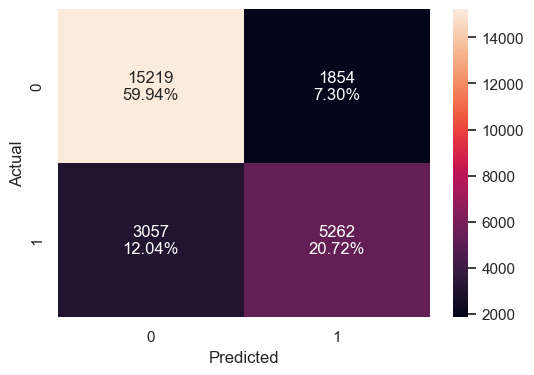

In [210]:
# Plot the confusion matrix for default threshold
default_threshold = 0.5
y_pred = model_lg_1.predict(X_train_1) > default_threshold
cm = confusion_matrix(y_train, y_pred)
labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())] for item in cm.flatten()]).reshape(2, 2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=labels,fmt="")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Observations
* The false negatives are 7.3% false positives are 12%.  An optimal threshold should be found to help minimize the false positives more. 

### ROC AUC (Training Set)

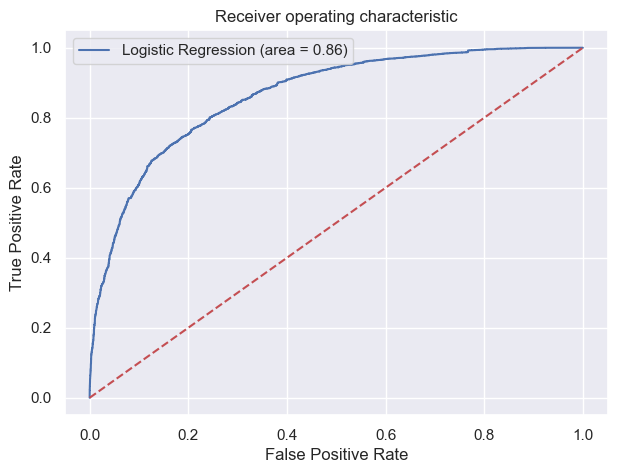

In [211]:
# Compute and plot the ROC AUC on the training set
ROC_AUC_train             = roc_auc_score(y_train, model_lg_1.predict(X_train_1))
FPR, TPR, plot_thresholds = roc_curve(y_train, model_lg_1.predict(X_train_1))
plt.figure(figsize=(7, 5))
plt.plot(FPR, TPR, label='Logistic Regression (area = %0.2f)' % ROC_AUC_train)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend()
plt.show()

In [212]:
# Determine the optimal threshold from ROC AUC
FPR_optimal, TPR_optimal, thresholds_optimal = roc_curve(y_train, model_lg_1.predict(X_train_1))
optimal_threshold_rocauc = thresholds_optimal[np.argmax(TPR_optimal - FPR_optimal)]
print('The optimal threshold using the ROC AUC curve is ' + str(optimal_threshold_rocauc))

The optimal threshold using the ROC AUC curve is 0.3329571917391751


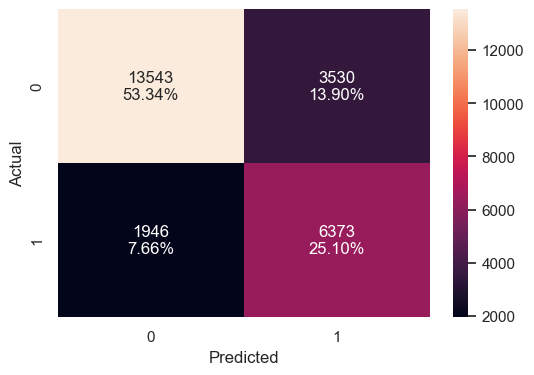

In [213]:
# Plot the confusion matrix for optimal threshold based on ROC-AUC curve
y_pred = model_lg_1.predict(X_train_1) > optimal_threshold_rocauc
cm = confusion_matrix(y_train, y_pred)
labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())] for item in cm.flatten()]).reshape(2, 2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=labels,fmt="")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Observations
* There is not a significant improvement from the default threshold in minimizing the false positives and false negatives except for now the false positives are 7.7% and false negatives are 13.9%.

In [214]:
# Check model performance for the model using ROC AUC to obtain optimal threshold
threshold_rocauc_train = performance(model_lg_1, X_train_1, y_train, optimal_threshold_rocauc)
threshold_rocauc_train

,Accuracy,Recall,Precision,F1
0,0.78434,0.76608,0.64354,0.69948


#### Observations
* The model with optimal threshold has similar performance the default threshold.

### Precision-Recall Curve

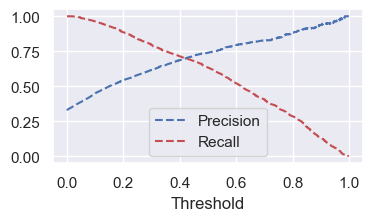

In [215]:
# Function used to find optimal threshold using the Precision-Recall Curve
def plot_prec_recall(p, r, t):
    """
    Function to plot recall and precision to find optimal threshold
    """
    # Plot of precision and recall
    plt.plot(t, p[:-1], "b--", label='Precision')
    plt.plot(t, r[:-1], "r--", label='Recall')
    plt.xlabel('Threshold')
    plt.legend()

# Find precision, recall and plot
y_score = model_lg_1.predict(X_train_1)
Pre, Rec, Tre = precision_recall_curve(y_train, y_score)
plot_prec_recall(Pre, Rec, Tre)
plt.show()

#### Observations
* The optimal threshold found by plotting the Precision-Recall plot shows that the threshold is somewhere around 0.4.

In [216]:
# Find the optimal threshold from the curve
arr = np.abs(Pre-Rec)
optimal_threshold_prcurve = Tre[np.argmin(arr)]
print('The optimal threshold using the Precision-Recall Curve is '+str(optimal_threshold_prcurve)+'.')

The optimal threshold using the Precision-Recall Curve is 0.4197617052606524.


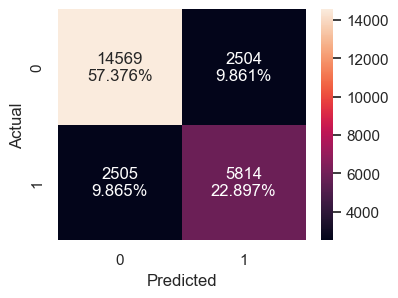

In [217]:
# Plot the confusion matrix for optimal threshold fround from Precision-Recall curve
y_pred = model_lg_1.predict(X_train_1) > optimal_threshold_prcurve
cm = confusion_matrix(y_train, y_pred)
labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.3%}".format(item / cm.flatten().sum())] for item in cm.flatten()]).reshape(2, 2)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=labels,fmt="")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Observations
* Now, the false positives are 9.8% and false negatives are 9.8% so this is an improvement from the previous thresholds.

In [218]:
# Check the model performance using the optimal threshold from Precision-Recall Curve
threshold_prcurve_train = performance(model_lg_1, X_train_1, y_train, optimal_threshold_prcurve)
threshold_prcurve_train

,Accuracy,Recall,Precision,F1
0,0.80273,0.69888,0.69897,0.69892


#### Observations
* The training set has good Recall, Precision, and F1 scores ~70 using the Precision-Recall Curve optimal threshold.

## Test Set Evalution

* #### Default Threshold = 0.5

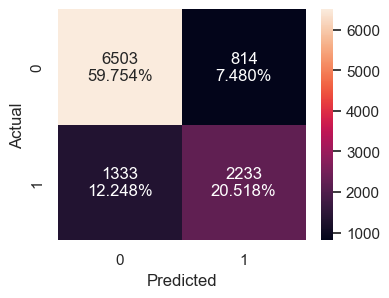

In [219]:
# Plot the confusion matrix for default threshold
y_predict = model_lg_1.predict(X_test_1) > 0.5
conf_mat  = confusion_matrix(y_test, y_predict)
labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.3%}".format(item / conf_mat.flatten().sum())] for item in conf_mat.flatten()]).reshape(2, 2)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=labels,fmt="")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Observations
* This is similar to the values seen from the training set.

In [220]:
# Check performance on test set using default threshold
def_thresh_test = performance(model_lg_1, X_test_1, y_test, 0.5)
def_thresh_test

,Accuracy,Recall,Precision,F1
0,0.80272,0.62619,0.73285,0.67534


#### Observations
* Low performance of the model for the recall.  Similar to the training set.

### ROC-AUC (Test Set)

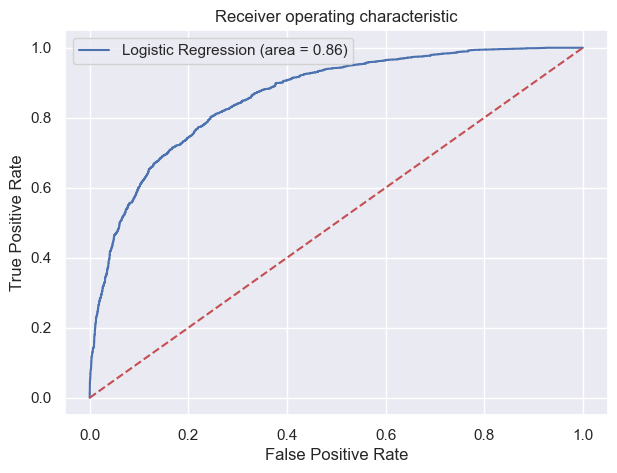

In [221]:
ROC_AUC_train             = roc_auc_score(y_test, model_lg_1.predict(X_test_1))
FPR, TPR, plot_thresholds = roc_curve(y_test, model_lg_1.predict(X_test_1))
plt.figure(figsize=(7, 5))
plt.plot(FPR, TPR, label='Logistic Regression (area = %0.2f)' % ROC_AUC_train)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend()
plt.show()

* #### Optimal Threshold = 0.33 (from ROC-AUC curve)

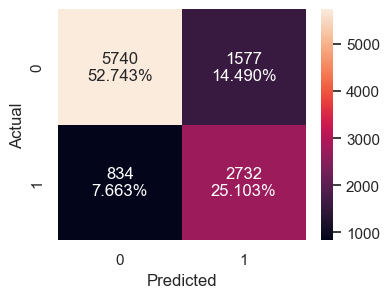

In [222]:
# Plot the confusion matrix for test set with ROC-AUC optimal threshold
y_predict = model_lg_1.predict(X_test_1) > optimal_threshold_rocauc
conf_mat  = confusion_matrix(y_test, y_predict)
labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.3%}".format(item / conf_mat.flatten().sum())] for item in conf_mat.flatten()]).reshape(2, 2)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=labels,fmt="")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Observations
* Similar false negative and false positives as the training set.

In [223]:
# Model performance using optimal threshold 0.33
threshold_rocauc_test = performance(model_lg_1, X_test_1, y_test, optimal_threshold_rocauc)
threshold_rocauc_test

,Accuracy,Recall,Precision,F1
0,0.77846,0.76612,0.63402,0.69384


#### Observations
* Now the Precision is low and could be improved.

* #### Optimal Threshold = 0.42  (from Precision-Recall curve)

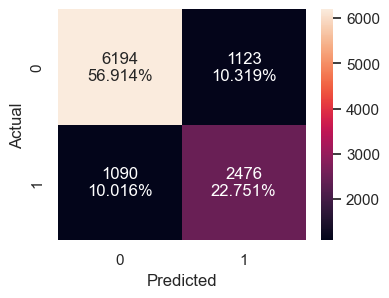

In [224]:
# Plot the confusion matrix for Precision-Recall Curve optimal threshold on test set
y_predict = model_lg_1.predict(X_test_1) > optimal_threshold_prcurve
conf_mat  = confusion_matrix(y_test, y_predict)
labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.3%}".format(item / conf_mat.flatten().sum())] for item in conf_mat.flatten()]).reshape(2, 2)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=labels,fmt="")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Observations
* Similar rate of false positives and false negatives as the training set.  

In [225]:
# Check model performance using optimal threshold from Precision-Recall Curve (0.42)
threshold_prcurve_test = performance(model_lg_1, X_test_1, y_test, optimal_threshold_prcurve)
threshold_prcurve_test

,Accuracy,Recall,Precision,F1
0,0.79666,0.69434,0.68797,0.69114


#### Observations
* The model stats on the test set show a similar to performance ~0.7 in Recall, Precision, and F1 score to the training set.

## Final Model Summary

In [226]:
# Reprint the final model
logit_1    = sm.Logit(y_train, X_train_1.astype(float))
model_lg_1 = logit_1.fit(disp=False, maxiter=500)
print(model_lg_1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Fri, 15 Dec 2023   Pseudo R-squ.:                  0.3312
Time:                        11:51:59   Log-Likelihood:                -10741.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.1885      0.119    -18.408      0.000      -2.421      -1.955
no_of_weekend_nights               0.1498      0.020      7.568      0.

In [227]:
# Convert the coefficient to odds and find the percent
odds      = np.exp(model_lg_1.params)
perc_odds = (odds - 1) * 100

In [228]:
# Print odds and percents from dataframe
pd.DataFrame({'Odds': odds, 'Percent Change': perc_odds}, index=X_train_1.columns)

,Odds,Percent Change
const,0.11209,-88.79127
no_of_weekend_nights,1.16163,16.16282
no_of_week_nights,1.03686,3.68572
required_car_parking_space,0.19893,-80.10671
lead_time,1.01601,1.60144
arrival_year,0.65066,-34.93396
arrival_month,0.95202,-4.79758
repeated_guest,0.04620,-95.37970
no_of_previous_cancellations,1.33534,33.53397
avg_price_per_room,1.01923,1.92270


### Coefficient Interpretation

* **no_of_weekend_nights**: holding all other features constant, a unit change in **no_of_weekend_nights** will increase the odds of a guest canceling a booking by 1.16 or a 16% increase in the odds of a guest canceling.
* **no_of_week_nights**: holding all other features constant, a unit change in **no_of_week_nights** will increase the odds of a guest canceling a booking by 1.04 or a 4% increase in the odds of a guest canceling.
* **required_parking_space**: holding all other features constant, a unit change in **required_parking_space** will decrease the odds of a guest canceling a booking by 0.19 or a 80% decrease in the odds of a guest canceling.
* **lead_time**: holding all other features constant, a unit change in **lead_time** will increase the odds of a guest canceling a booking by 1.02 or a 1% increase in the odds of a guest canceling.
* **arrival_year**: holding all other features constant, a unit change in **arrival_year** will decrease the odds of a guest canceling a booking by 0.65 or a 35% decrease in the odds of a guest canceling.
* **lead_time**: holding all other features constant, a unit change in **lead_time** will increase the odds of a guest canceling a booking by 1.02 or a 1% increase in the odds of a guest canceling.
* **repeated_guest**: holding all other features constant, a unit change in **repeated_guest** will decrease the odds of a guest canceling a booking by 0.04 or a 95% decrease in the odds of a guest canceling.
* **no_of_previous_cancellations**: holding all other features constant, a unit change in **no_of_previous_cancellations** will increase the odds of a guest canceling a booking by 1.33 or a 34% increase in the odds of a guest canceling.
* **avg_price_per_room**: holding all other features constant, a unit change in **avg_price_per_room** will increase the odds of a guest canceling a booking by 1.02 or a 2% increase in the odds of a guest canceling.
* **no_of_special_requests**: holding all other features constant, a unit change in **no_of_special_requests** will decrease the odds of a guest canceling a booking by 0.22 or a 77% decrease in the odds of a guest canceling.
* **type_of_meal_plan_Meal Plan_2**: holding all other features constant, a unit change in **type_of_meal_plan_Meal Plan_2** will increase the odds of a guest canceling a booking by 1.18 or a 18% increase in the odds of a guest canceling.
* **type_of_meal_plan_Meal Not_Selected**: holding all other features constant, a unit change in **type_of_meal_plan_Meal Not_Selected** will increase the odds of a guest canceling a booking by 1.23 or a 23% increase in the odds of a guest canceling.
* **room_type_reserved_Type 2**: holding all other features constant, a unit change in **type_of_meal_plan_Meal_Type 2** will decrease the odds of a guest canceling a booking by 0.68 or a 31% decrease in the odds of a guest canceling.
* **room_type_reserved_Type 4**: holding all other features constant, a unit change in **room_type_reserved_Type 4** will decrease the odds of a guest canceling a booking by 0.76 or a 23% decrease in the odds of a guest canceling.
* **room_type_reserved_Type 5**: holding all other features constant, a unit change in **room_type_reserved_Type 5** will decrease the odds of a guest canceling a booking by 0.5 or a 50% decrease in the odds of a guest canceling.
* **room_type_reserved_Type 6**: holding all other features constant, a unit change in **room_type_reserved_Type 6** will decrease the odds of a guest canceling a booking by 0.47 or a 52% decrease in the odds of a guest canceling.
* **room_type_reserved_Type 7**: holding all other features constant, a unit change in **room_type_reserved_Type 7** will decrease the odds of a guest canceling a booking by 0.26 or a 73% decrease in the odds of a guest canceling.
* **market_segment_type_Corporate**: holding all other features constant, a unit change in **market_segment_type_Corporate** will decrease the odds of a guest canceling a booking by 0.42 or a 58% decrease in the odds of a guest canceling.
* **market_segment_type_Offline**: holding all other features constant, a unit change in **market_segment_type_Offline** will decrease the odds of a guest canceling a booking by 0.17 or a 83% decrease in the odds of a guest canceling.

In [229]:
# Training Set Performance Summary
final_model_summary_train = pd.concat([def_thresh_train.T, threshold_rocauc_train.T, threshold_prcurve_train.T,],axis=1)
final_model_summary_train.columns = [
    "Logistic Regression-0.5 Threshold",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training Set Performance Summary:")
final_model_summary_train

Training Set Performance Summary:


,Logistic Regression-0.5 Threshold,Logistic Regression-0.33 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80659,0.78434,0.80273
Recall,0.63253,0.76608,0.69888
Precision,0.73946,0.64354,0.69897
F1,0.68183,0.69948,0.69892


In [230]:
# Test Set Performance Summary
final_model_summary_test = pd.concat([def_thresh_test.T, threshold_rocauc_test.T, threshold_prcurve_test.T,],axis=1)
final_model_summary_test.columns = [
    "Logistic Regression-0.5 Threshold",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test Set Performance Summary:")
final_model_summary_test

Test Set Performance Summary:


,Logistic Regression-0.5 Threshold,Logistic Regression-0.33 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80272,0.77846,0.79666
Recall,0.62619,0.76612,0.69434
Precision,0.73285,0.63402,0.68797
F1,0.67534,0.69384,0.69114


### Logistic Regression Model Summary

* This logistic regression model can be used with optimal threshold 0.42 by the hotel to determine what guests will cancel their booking with an f1 score of 0.69 on the training set and use them to adjust their policies.  The model with the optimal threshold 0.42 shows similar performance on the training and test set as well as high performance for the f1 score, precision, and recall.

* Coefficient of number of previous cancellations, no meal selected, and Meal Plan 2 are positive an increase in these will lead to increase in chances of a guest canceling their booking.

* Coefficient of repeated guest, offline market segment, and required car parking space are negative so an increase in these will lead to decrease in chances of a a guest canceling a booking.

## Building a Decision Tree model

### Default sklearn Decision Tree Model

In [231]:
# Fit the Default Decision Tree Model
Tree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
Tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Training Set (Default Tree)

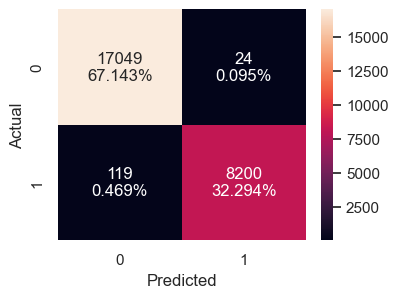

In [232]:
# Plot the confusion matrix for default tree training set
y_predict = Tree.predict(X_train)
conf_mat  = confusion_matrix(y_train, y_predict)
labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.3%}".format(item / conf_mat.flatten().sum())] for item in conf_mat.flatten()]).reshape(2, 2)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=labels,fmt="")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Observations
* The default Decision Tree Model has a very low false positive and false negatives rates.

In [233]:
# Function to compute model performance stats of tree
def performance_dt(DT, x_perf, y_perf):
    """
    DT: Decision Tree Model
    x_perf: independent variables
    y_perf: dependent variable
    """

    # Predict tree independent variables
    tree_pred = DT.predict(x_perf)

    A = accuracy_score(y_perf, tree_pred)   # Accuracy
    R = recall_score(y_perf,   tree_pred)   # Recall
    P = precision_score(y_perf,tree_pred)   # Precision
    F1 = f1_score(y_perf,      tree_pred)   # F1-score

    # Dataframe to hold model stats
    stats_df = pd.DataFrame({'Accuracy': A, 'Recall': R, 'Precision': P, 'F1': F1,}, index=[0],)

    return stats_df

In [234]:
# Print the model performance for the default tree
default_dt_train = performance_dt(Tree, X_train, y_train)
default_dt_train

,Accuracy,Recall,Precision,F1
0,0.99437,0.98570,0.99708,0.99136


#### Observations
* The default tree has high performance on the training set for all the stats, but the performance on test set needs to be checked because this high of performance indicates that likely the model is overfitting.

#### Test Set (Default Tree)

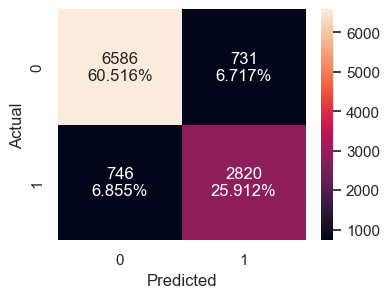

In [235]:
# Plot the confusion matrix for default tree test set
y_predict = Tree.predict(X_test)
conf_mat  = confusion_matrix(y_test, y_predict)
labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.3%}".format(item / conf_mat.flatten().sum())] for item in conf_mat.flatten()]).reshape(2, 2)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=labels,fmt="")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Observations
* The test set shows low false positive and false negative rates ~7%, but they're not as good as the training set rates.

In [236]:
# Default tree model performance on test set
default_dt_test = performance_dt(Tree, X_test, y_test)
default_dt_test

,Accuracy,Recall,Precision,F1
0,0.86428,0.79080,0.79414,0.79247


#### Observation
* The default tree has a much lower performance on the test set as all the stats are significantly lower than the training set.  This means that the model is overfitting.

#### Important Features of the Default Tree

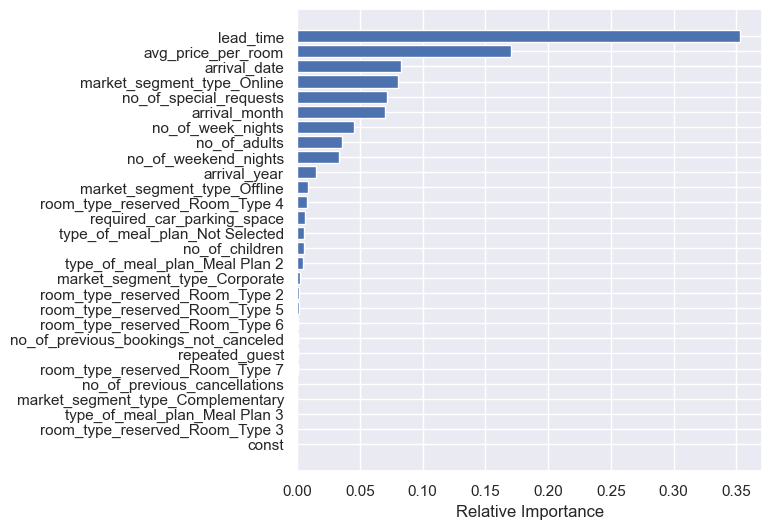

In [237]:
# Extract the important features of the Tree and sort them in order of importance
important_features   = Tree.feature_importances_
index_of_importances = np.argsort(important_features)

# Plot the most important features of the Tree
plt.figure(figsize=(6, 6))
plt.barh(range(len(index_of_importances)), important_features[index_of_importances], align="center")
plt.yticks(range(len(index_of_importances)), [X_train.columns[j] for j in index_of_importances])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
* With the current Default Decision Tree Model the lead time and average price per room are some of the most important features.

## Do we need to prune the tree?

* There is quite a difference between the training and test model performance.  This indicates that the model is overfitting so pruning is necessary to reduce overfitting.

### Pre-pruning Decision Tree

In [238]:
# Set new Decision Tree Model to hyperparameterize
Tree_2 = DecisionTreeClassifier(random_state=1)

# Grid of parameters for model to choose
params = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Score to compare combinations of parameters
score = make_scorer(f1_score)

# GridSearch applied to the current model
grid_obj = GridSearchCV(Tree_2, params, scoring=score, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the model based on best set of parameters
Tree_2 = grid_obj.best_estimator_

# Fit the best combination of parameters to model
Tree_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=70, random_state=1)

### Hyperparameter-tuned Decision Tree Model Evaluation

#### Pre-pruned Decision Tree Confusion Matrix and Performance (Training Set)

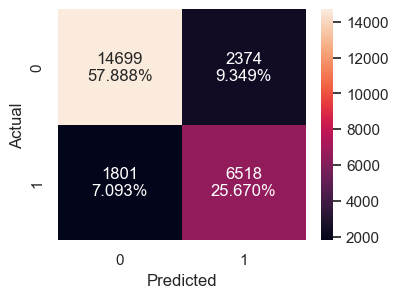

In [239]:
# Plot the confusion matrix for hyperparameter-tuned tree on the training set
y_predict = Tree_2.predict(X_train)
conf_mat  = confusion_matrix(y_train, y_predict)
labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.3%}".format(item / conf_mat.flatten().sum())] for item in conf_mat.flatten()]).reshape(2, 2)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=labels,fmt="")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Observations
* The pre-pruned Tree shows a false positive rate of 7% while it also has a false negative rate of 9%.

In [240]:
# Print the pre-pruned decision tree model performance stats
preprune_dt_train = performance_dt(Tree_2, X_train, y_train)
preprune_dt_train

,Accuracy,Recall,Precision,F1
0,0.83558,0.78351,0.73302,0.75742


#### Observations
* The training set shows decent performance with similar Recall, Precision, and F1 scores.

#### Pre-pruned Decision Tree Confusion Matrix and Performance (Test Set)

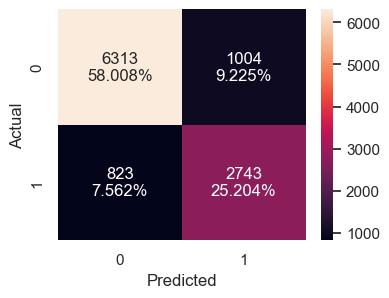

In [241]:
# Plot the confusion matrix for hyperparameter-tuned tree on the test set
y_predict = Tree_2.predict(X_test)
conf_mat  = confusion_matrix(y_test, y_predict)
labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.3%}".format(item / conf_mat.flatten().sum())] for item in conf_mat.flatten()]).reshape(2, 2)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=labels,fmt="")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Observations
* The test set shows similar false positives and false negatives rates as the training set.

In [242]:
# Print prepruned decision tree model performance on the test set
preprune_dt_test = performance_dt(Tree_2, X_test, y_test)
preprune_dt_test

,Accuracy,Recall,Precision,F1
0,0.83212,0.76921,0.73205,0.75017


#### Observations
* Similar confusion matrix and model performance on the training and test set for the pre-pruned Decision Tree.

### Pre-pruned Decision Tree

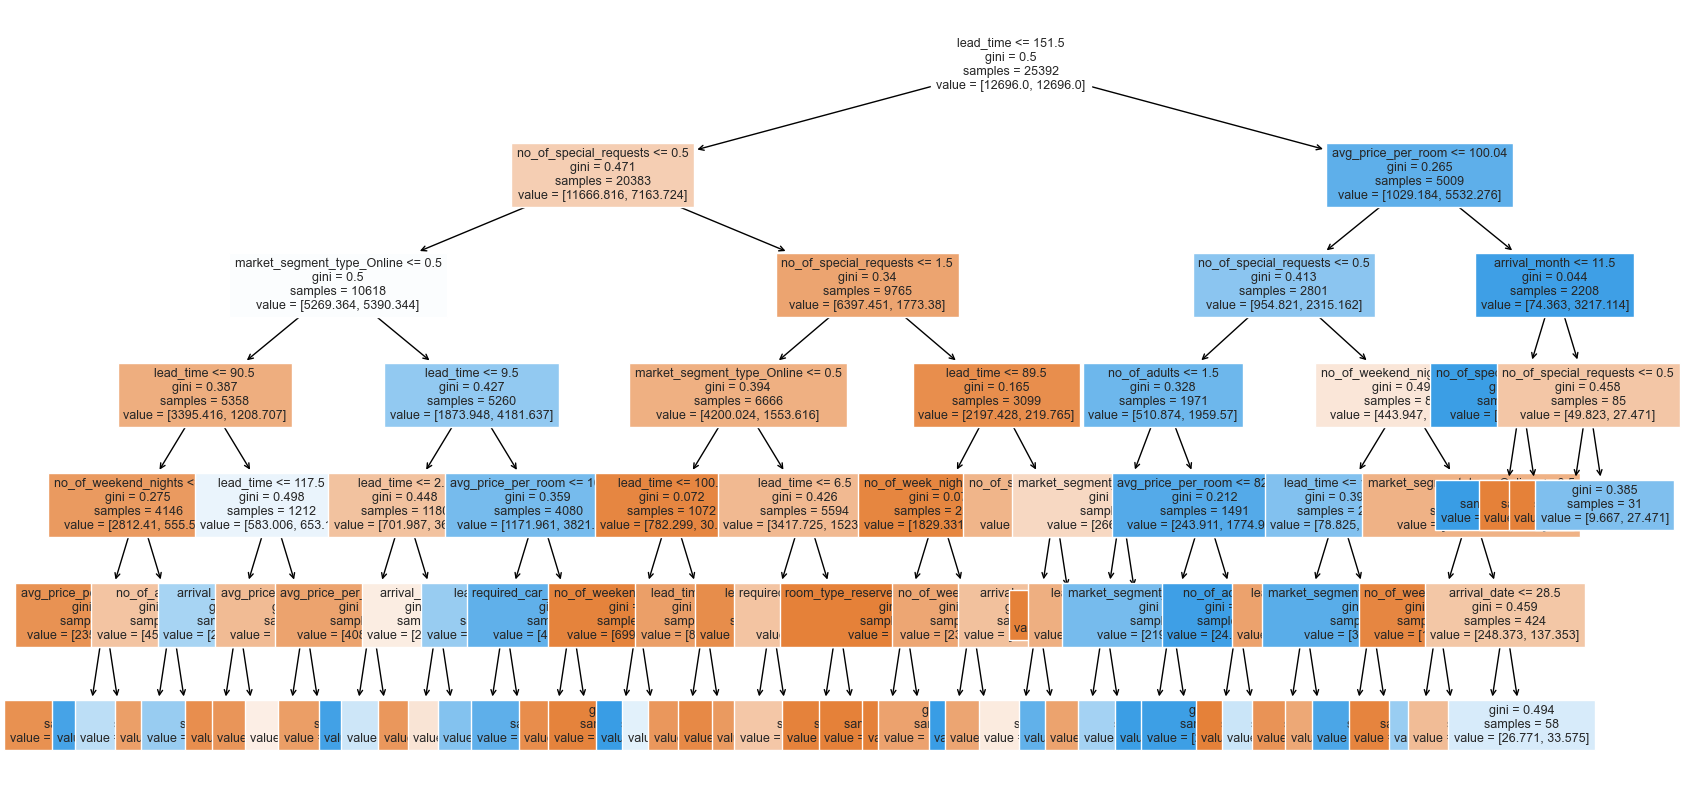

In [243]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
dt_plot = tree.plot_tree(
        Tree_2,
        feature_names=X_train.columns,
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None,
)
# Fill in missing arrows in tree
for i in dt_plot:
    add_arrow = i.arrow_patch
    if add_arrow is not None:
        add_arrow.set_edgecolor("black")
        add_arrow.set_linewidth(1)
plt.show()

#### Observations
* The pre-pruned Tree seems to have a more reasonable number of nodes than the default Tree.

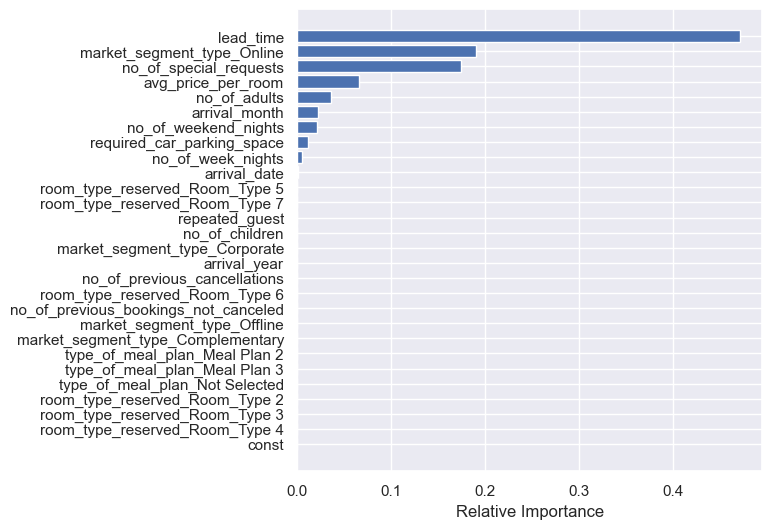

In [244]:
# Extract the feature importances and sort with respect to importance
important_features   = Tree_2.feature_importances_
index_of_importances = np.argsort(important_features)

# Plot the importances of the tuned Tree
plt.figure(figsize=(6, 6))
plt.barh(range(len(index_of_importances)), important_features[index_of_importances])
plt.yticks(range(len(index_of_importances)), [X_train.columns[j] for j in index_of_importances])
plt.xlabel('Relative Importance')
plt.show()

#### Observations
* Lead time is the most prominent feature of the pre-pruned Tree, followed by online bookings, and number of special requests.

### Post-pruned Decision Tree Model

In [245]:
# Set the classifier and extract the alphas and impurities
Tree_3                 = DecisionTreeClassifier(random_state=1, class_weight='balanced')
pruning_path           = Tree_3.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(pruning_path.ccp_alphas), pruning_path.impurities

In [246]:
# Print out a table of the alphas and impurities
alphas_impurities = pd.DataFrame({'Alphas': ccp_alphas, 'Impurities': impurities})
alphas_impurities.head(20)

,Alphas,Impurities
0,0.00000,0.00833
1,0.00000,0.00833
2,0.00000,0.00833
3,0.00000,0.00833
4,0.00000,0.00833
5,0.00000,0.00833
6,0.00000,0.00833
7,0.00000,0.00833
8,0.00000,0.00833
9,0.00000,0.00833


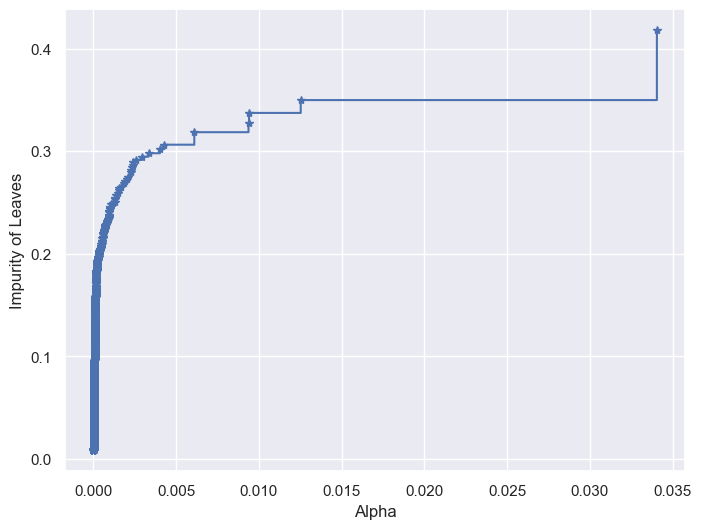

In [247]:
# Plot of alphas and impuirities
plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='*',drawstyle='steps-post')
plt.xlabel('Alpha')
plt.ylabel('Impurity of Leaves')
plt.show()

#### Observations
* The impurity of the leaves increases non-linearly as alpha increases.

### Train the Tree using Alphas

In [248]:
# Empty list to hold trees with each alpha
Tree_train_alphas = []

# Fill the list with each tree pertaining to a different alpha
for ccp_alpha in ccp_alphas:
    Tree_4 = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight='balanced')
    Tree_4.fit(X_train, y_train)
    Tree_train_alphas.append(Tree_4)
    
# Print the number of nodes in the last tree and corresponding alpha
print('The number of nodes in the last tree is: {} with ccp_alpha: {}'.format(
        Tree_train_alphas[-1].tree_.node_count, ccp_alphas[-1]))

The number of nodes in the last tree is: 1 with ccp_alpha: 0.08205938055988526


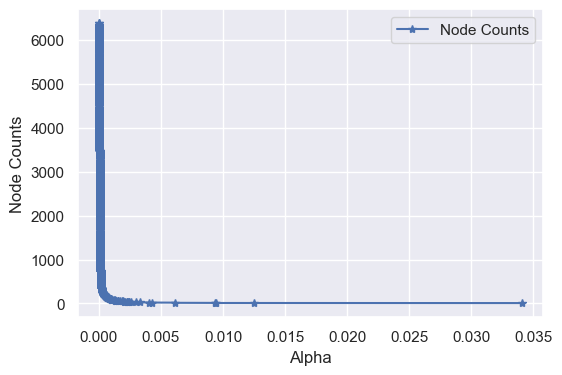

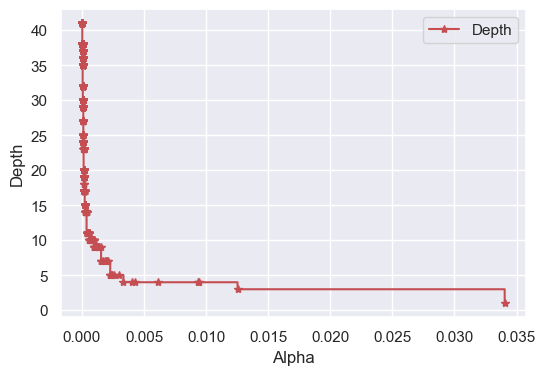

In [249]:
# Remove the last node in the lists
Tree_train_alphas = Tree_train_alphas[:-1]
ccp_alphas = ccp_alphas[:-1]

# Lists to hold node counts and max depth for each model iteration
node_counts = [Tree_4.tree_.node_count for Tree_4 in Tree_train_alphas]
depth = [Tree_4.tree_.max_depth for Tree_4 in Tree_train_alphas]

# Plot of Node counts vs. alpha
plt.figure(figsize=(6, 4))
plt.plot(ccp_alphas, node_counts, marker='*', drawstyle='steps-post', label='Node Counts')
plt.xlabel('Alpha')
plt.ylabel('Node Counts')
plt.legend()
plt.show()

# Plot of Depth vs. alpha
plt.figure(figsize=(6,4))
plt.plot(ccp_alphas, depth, marker='*', drawstyle='steps-post', label='Depth', c='r')
plt.xlabel('Alpha')
plt.ylabel('Depth')
plt.legend()
plt.show()

#### Observations
* As the node counts and depth decrease, alpha increases.  It is nonlinear.

### F1 Score and Alpha

In [250]:
# Compute the f1 score for each alpha for the training set
f1_train = []
for j in Tree_train_alphas:
    f1_pred_train  = j.predict(X_train)
    F1_Score_train = f1_score(y_train, f1_pred_train)
    f1_train.append(F1_Score_train)

# Compute the f1 score for each alpha for the test set
f1_test = []
for k in Tree_train_alphas:
    f1_pred_test  = k.predict(X_test)
    F1_Score_test = f1_score(y_test, f1_pred_test)
    f1_test.append(F1_Score_test)

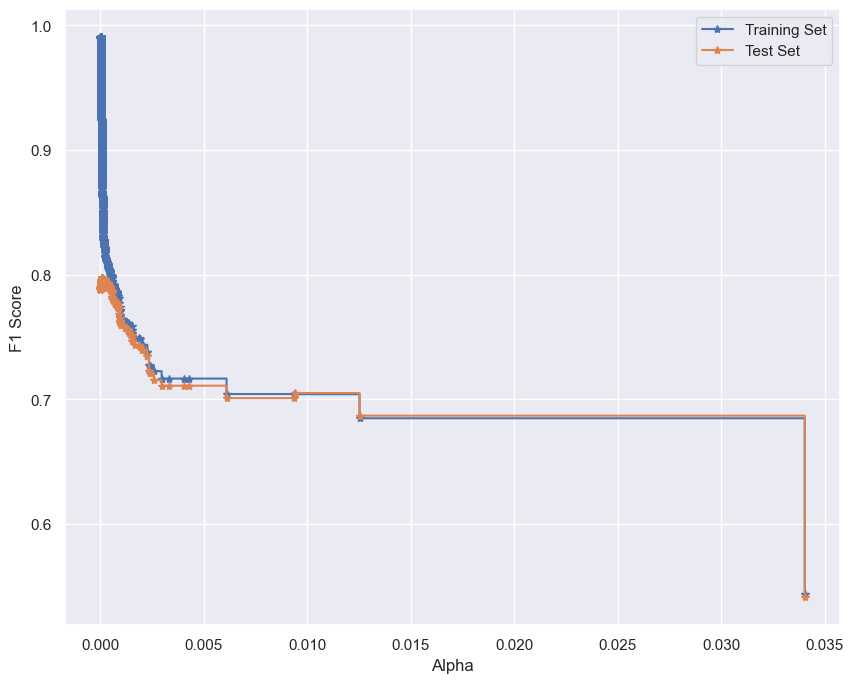

In [251]:
# Plot the f1 score for each alpha
plt.figure(figsize=(10, 8))
plt.plot(ccp_alphas, f1_train, marker='*', label='Training Set', drawstyle='steps-post')
plt.plot(ccp_alphas, f1_test,  marker='*', label='Test Set',     drawstyle='steps-post')
plt.xlabel('Alpha')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

#### Observations
* The f1 score rapidly decreases for the training set as alpha increases.
* The f1 score decreases slower for the test set compared to the training set as alpha increases.
* The f1 score is similar for the test and training set at around ~0.00100 until 0.00200.

In [252]:
# Print the best post-pruning model
Tree_index = np.argmax(f1_test)
Tree_4     = Tree_train_alphas[Tree_index]
print(Tree_4)

DecisionTreeClassifier(ccp_alpha=0.00010709530427669979,
                       class_weight='balanced', random_state=1)


#### Observations
* The best post-pruned decision tree corresponds to the alpha 0.00010709530427669979.

### Post-pruning Best Decision Tree

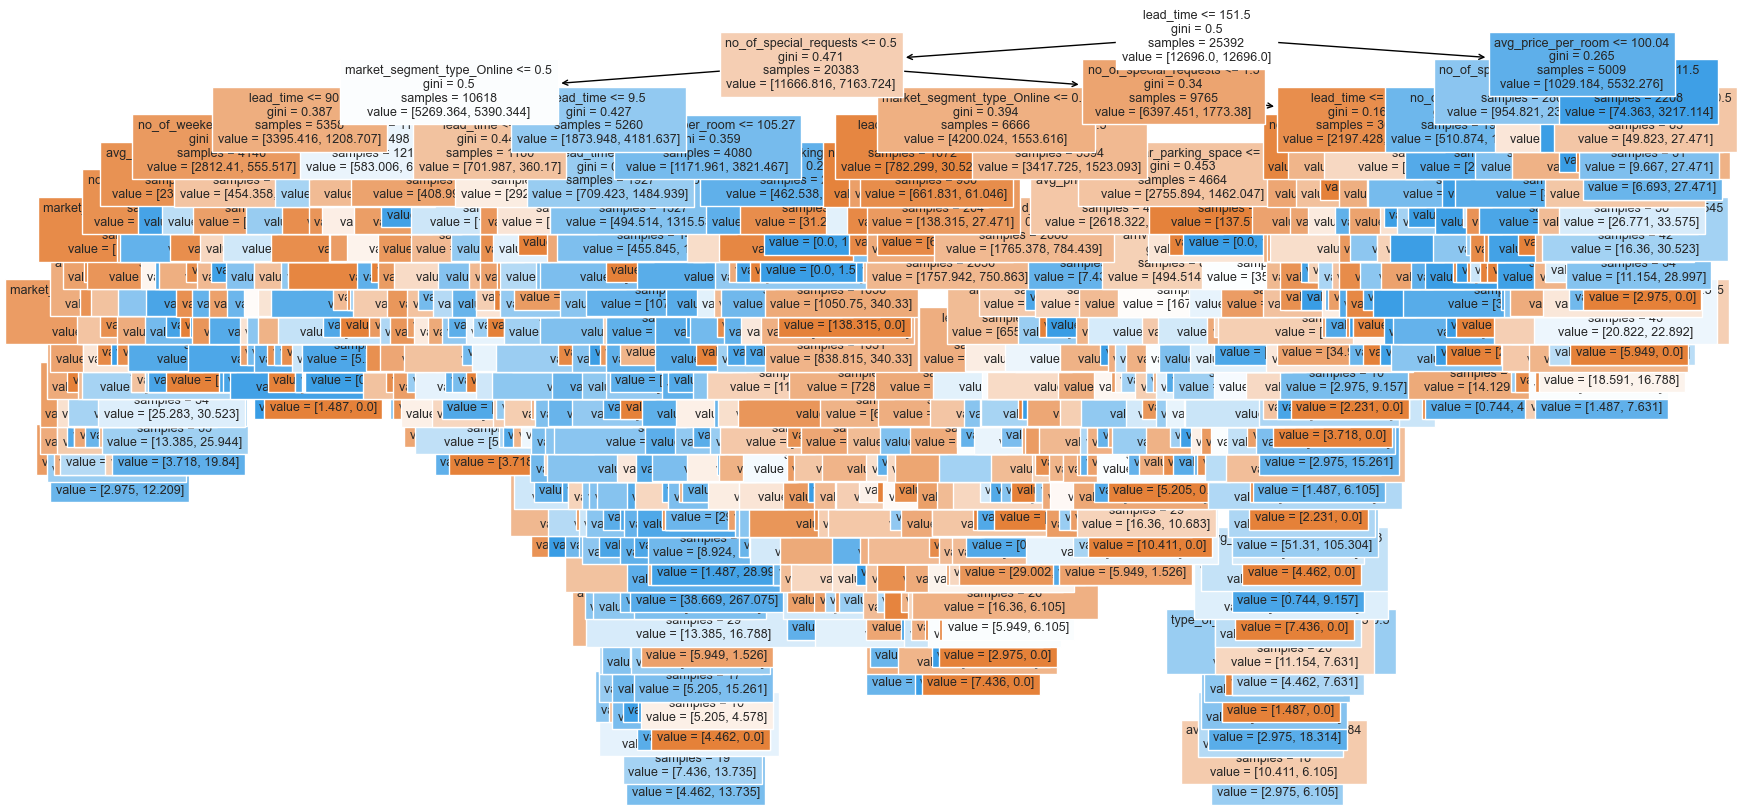

In [253]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
dt_plot = tree.plot_tree(
        Tree_4,
        feature_names=X_train.columns,
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None,
)
# Fill in missing arrows in tree
for i in dt_plot:
    add_arrow = i.arrow_patch
    if add_arrow is not None:
        add_arrow.set_edgecolor("black")
        add_arrow.set_linewidth(1)
plt.show()

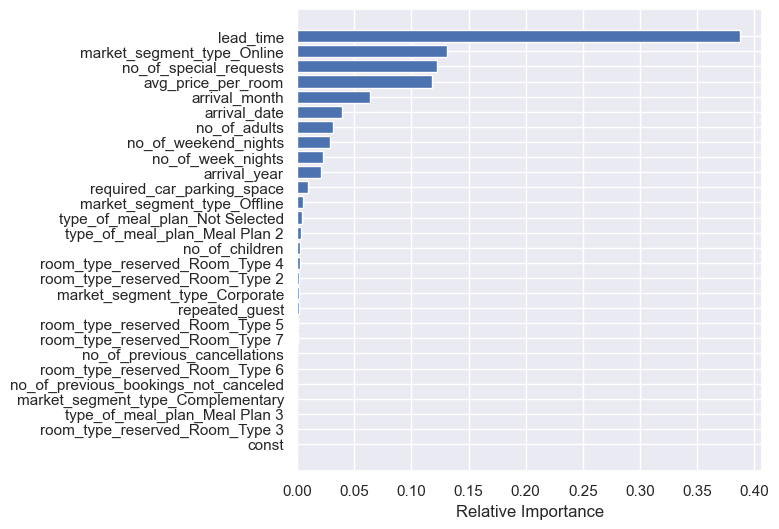

In [254]:
# Extract the feature importances and sort with respect to importance
important_features   = Tree_4.feature_importances_
index_of_importances = np.argsort(important_features)

# Plot the importances of the tuned Tree
plt.figure(figsize=(6, 6))
plt.barh(range(len(index_of_importances)), important_features[index_of_importances], align="center")
plt.yticks(range(len(index_of_importances)), [X_train.columns[m] for m in index_of_importances])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
* Lead time is, by far, the best predictor of cancellation, followed by booking online, and number of special requests.

In [255]:
# Print the post-pruned Decision Tree rules
features = list(X.columns)
print(tree.export_text(Tree_4,feature_names=features,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 87.25
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [54.29, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  87.25
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   |   |   |   |  

#### Training Set Performance

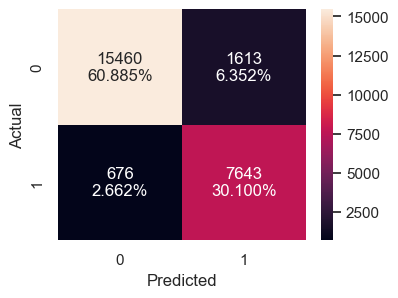

In [256]:
# Plot the confusion matrix for hyperparameter-tuned tree on the test set
y_predict = Tree_4.predict(X_train)
conf_mat  = confusion_matrix(y_train, y_predict)
labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.3%}".format(item / conf_mat.flatten().sum())] for item in conf_mat.flatten()]).reshape(2, 2)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=labels,fmt="")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Observations
The false negatives and false positives are showing a low rate for the post-pruned Tree.

In [257]:
# Print post-pruned model performance
postprune_dt_train = performance_dt(Tree_4, X_train, y_train)
postprune_dt_train

,Accuracy,Recall,Precision,F1
0,0.90985,0.91874,0.82573,0.86976


#### Observations
* The model is showing high performance in the Recall, Precision, and F1 scores but needs to be compared to the test set performance.

#### Test Set Performance

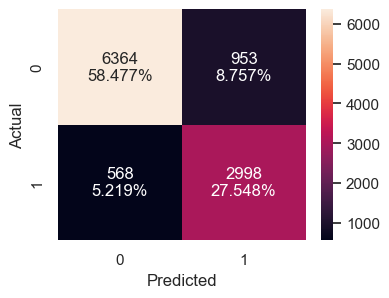

In [258]:
# Plot the confusion matrix for hyperparameter-tuned tree on the test set
y_predict = Tree_4.predict(X_test)
conf_mat  = confusion_matrix(y_test, y_predict)
labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.3%}".format(item / conf_mat.flatten().sum())] for item in conf_mat.flatten()]).reshape(2, 2)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=labels,fmt="")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [259]:
# Print post-pruned model performance on test set
postprune_dt_test = performance_dt(Tree_4, X_test, y_test)
postprune_dt_test

,Accuracy,Recall,Precision,F1
0,0.86024,0.84072,0.75880,0.79766


#### Observations
* The test set is showing lower performance on the test set compared to the training set which indicates that the model is overfitting some.

## Decision Tree Model Performance Comparison and Conclusions

In [260]:
# Training Set Performance Summary
final_tree_summary_train = pd.concat([default_dt_train.T, preprune_dt_train.T, postprune_dt_train.T,],axis=1)
final_tree_summary_train.columns = [
    'Default Decision Tree',
    'Pre-pruned Decision Tree',
    'Post-pruned Decision Tree',
]

print('Training Set Decision Tree Model Performance Summary:')
final_tree_summary_train

Training Set Decision Tree Model Performance Summary:


,Default Decision Tree,Pre-pruned Decision Tree,Post-pruned Decision Tree
Accuracy,0.99437,0.83558,0.90985
Recall,0.98570,0.78351,0.91874
Precision,0.99708,0.73302,0.82573
F1,0.99136,0.75742,0.86976


In [261]:
# Test Set Performance Summary
final_test_summary_test = pd.concat([default_dt_test.T, preprune_dt_test.T, postprune_dt_test.T,],axis=1)
final_test_summary_test.columns = [
    'Default Decision Tree',
    'Pre-pruned Decision Tree',
    'Post-pruned Decision Tree',
]

print('Test Set Decision Tree Model Performance Summary:')
final_test_summary_test

Test Set Decision Tree Model Performance Summary:


,Default Decision Tree,Pre-pruned Decision Tree,Post-pruned Decision Tree
Accuracy,0.86428,0.83212,0.86024
Recall,0.79080,0.76921,0.84072
Precision,0.79414,0.73205,0.75880
F1,0.79247,0.75017,0.79766


#### Observations
* The pre-pruned Decision Tree Model has a good f1 score performance 0.75 on both the training and test set.  It is able to identify 75% of cancellations and has generalized performance on the training and test set.
* Lead time, by far, is the number one predictor of whether a guest will cancel a booking or not.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

### EDA and Model Insights
#### Features that increase chance of cancellation
* From the Logistic Regression Model features such as number of previous cancellations, no meal selected, and selection of Meal Plan 2 increased the chance of a guest canceling their booking.
* From the Decision Tree Model, lead time was the number one predictor that a guest would cancel.  This was also observed with the EDA since it was shown that longer lead times were associated with a higher number of cancellations.   
* Other relatively important features favoring cancellation from the Decision Tree Model was the online market segment, number of special requests, and average price per room.  It was observed through the EDA that most guests booked online so naturally this booking method had the most cancellations.  In addition, it was observed in the EDA that the highest number of cancellations was associated with the lowest average price per room.

#### Features that decreased the chance of cancellation
* On the other hand, with the Logistic Regression Model some features favored a decrease in the chance of cancellation such as repeated guest, offline market segment, and required car parking space decreased the chance of a a guest canceling a booking from the logistic regression model.  Also, it was shown from the EDA that 97% of guests were not repeated guests.

### Reccomendations
* The hotel should adjust their cancellation and refund policies. The EDA showed that the average number of days of lead time for those that canceled was a little over a hundred days and 75% of guests who canceled did so around 200 days prior to arrival.  
* The hotel could implement a policy whereby guests will pay a cancellation fee if they cancel within 200 days of their arrival day.  If they cancel before the 200 days the hotel will issue a refund to the guests since the hotel has time to resell the room.  However, if the guest cancels within 200 days of arrival date they will pay a cancellation fee that will help the hotel pay for publicity or seek out distribution channels by increasing commisions and resources needed to resell the room.  This will help the hotel increase profits to avoid having to lower the price of the rooms last minute which reduces profit margin.
* Furthermore, the hotel could offer an incentive program for repeated guests to promote guests to re-book with the hotel since it was shown by the Decision Tree Model that the feature repeated guests favors a decrease in cancellation and through the EDA it was shown that most guests were not repeated guests.  
* Also, the hotel can increase its advertisement in the offline market segment since it has been shown through the model that this method of booking decreased the chance that a guest would cancel.  